# Time Evolution and Chaos - Mini Project 3

- Name - Apurv Keer
- Roll no. - 210260007

Also edit the filename to include your name and/or roll number.

## Introduction
So far, we have discussed solving a system of equations, with focal points being a linear system of equations or an eigenvalue problem, both of which are fairly common problems with a wide variety of applications (e.g. [a physics simulator with Langrangian approach](https://www.youtube.com/watch?v=oulfRfqTxJA)). However, time-evolution is also a field of problems that is basically necessary to solving problems. Here we shall focus on solving small toy problems with few variables, but the methods still scale.

## Euler's method
So what even is a time-evolution problem? In physics, we are usually daling with problem where the time derivatve, first order or higher, is dependent on the current state of the system. You may also remember classics such as Newton's second law of motion :
$$ m a = m \frac{d^2 x}{dt^2} = F $$
Here, the force $F$ can be something that depends on the position $x$, time $t$ and other things. One of these can be velocity $v = \frac{dx}{dt}$, which is another thing that needs to be kept track of moment to moment. Newtonian mechanics is
- a) a second-order system of equations to solve, and
- b) it obfuscates the role of velocity, which is an equally important component of dynamics.

The reason we don't want to deal with second-order dynamics will be evident shortly. Thus let us perform a perspecitve shift to Hamiltonian dynamics, where the situation is much more pleasant.
$$\frac{dq_i}{dt} = \frac{\partial \mathscr{H}}{\partial p_i} \hspace{3em}
\frac{dp_i}{dt} = -\frac{\partial \mathscr{H}}{\partial q_i}
$$
Here we can clearly see that the system is described using the pairs of values $(q_i, p_i)$ and the updates to the system are controlled through those values themselves, no variables swept under the rug this time.

This time, let us skip analysis and directly get to coding. Ok, we need one bit of analysis.
### Question 1

1.   Here we shall consider a simple mass(=$m$) on a spring(spring constant = $k$)  with state variables position $x$ and velocity $v$. No need to consider the Hamiltonian or anything, just think and write down what the time-derivative of the position and velocity will be.
2.   Now discretize the time derivatives using $x_i$, and $x_{i+1}$ which happens a time $\Delta t$ later, and similar variables for velocity. In the end, arrive at an iterative formula which gives $x_{i+1}$ and $v_{i+1}$ in the state of the system from the previous time-step. Don't use matrices and vectors, things are about to get non-linear fairly shortly.



# Answer 1

The equations of motion are
$$ m\ddot{x} + kx = 0 \\
   v = \frac{dx}{dt} \\
   a = \frac{dv}{dt} = -\omega^2 x$$
where $\omega = \sqrt{\frac{k}{m}}$

Discretization

$$ \frac{x_{i+1}-x_{i}}{\Delta t} = v_{i} \\
    \frac{v_{i+1}-v_{i}}{\Delta t} = -\omega^2 x_{i}$$
    
The iterative relations are
$$  x_{i+1} = x_{i} + v_{i}\Delta t \\
    v_{i+1} = v_{i} - \omega^2 x_{i}\Delta t$$


In [22]:
#Library imports
from math import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from time import sleep

# Coding pro-tip : If something is going to loop a lot and take time, use tqdm()
# around any iterable to get a handy progress bar. Examples below.

print("Looping once,")
for i in tqdm(range(10)) :
  sleep(0.2)

print()

print("Looping twice,")
for i in tqdm(range(5), desc=" outer", leave=True) :
  for i in tqdm(range(int(1e2)), desc=" inner", leave=False) :
    sleep(1 / 1e2)

print()

print("Looping arbitrarily,")
list_to_be_looped = ["Ohayo"] + list(range(0,4)) + ["Sekai"] + list(range(4,8)) + ["Good Morning"] + list(range(8,12)) + ["World"]
progress_bar = tqdm(list_to_be_looped)
for element in progress_bar :
  progress_bar.set_description(" Processing %s..." % element)
  if isinstance(element, str) :
    sleep(2)
  else :
    sleep(0.5)

print("Done.")


Looping once,


  0%|          | 0/10 [00:00<?, ?it/s]


Looping twice,


 outer:   0%|          | 0/5 [00:00<?, ?it/s]

 inner:   0%|          | 0/100 [00:00<?, ?it/s]

 inner:   0%|          | 0/100 [00:00<?, ?it/s]

 inner:   0%|          | 0/100 [00:00<?, ?it/s]

 inner:   0%|          | 0/100 [00:00<?, ?it/s]

 inner:   0%|          | 0/100 [00:00<?, ?it/s]


Looping arbitrarily,


  0%|          | 0/16 [00:00<?, ?it/s]

Done.


Ok, now code it up. Consider k = m = 1. We'll do the plotting stuff for you.

### Question 2

In [85]:
# Create a function that returns the time derivative for the positon and velocity in a numpy list
# It's being kept separate because [it's a surprise tool that will help us later](https://i.kym-cdn.com/photos/images/original/001/264/842/220.png)
def SHM_derivative(state, time = None) :
  """ Accept the position and velocity in a numpy list of length 2.
      Return the time derivatives in the form of a numpy list as well.
      state : the state vector, form is np.array([x, v])
      time : float that gives the time.
      slope : the time derivative vector, form is np.array([dx_dt, dv_dt])
  """
  x = state[0]
  v = state[1]

  # Your code here: Fill these None values in
  dx_dt = v
  dv_dt = -x

  slope = np.array([dx_dt, dv_dt])
  return slope

def euler_method_evolution(state_0, end_time, timestep, time_derivative = lambda state : np.zeros_like(state)) :
  """Evolve the system over time differences of `timestep` starting from t=0
     until we reach the target time.
     Return a list of the entire history of the system, containing all states.
     Be sure to keep it a list of lists, e.g. [ [x_0, v_0],
                                                [x_1, v_1],
                                                .... ]
  """
  history = [state_0]
  
  def f(state, offset=None, time=None):
    state_copy = state.copy()
    if (offset is not None):
        state_copy += offset
    return time_derivative(state_copy)

  state = state_0
    
  for i in tqdm(range(int(end_time/timestep))) :
    k = f(state)
    state_new = state + (timestep)*(k)
    history.append(state_new)
    state = state_new      

  return history

Quick subquestion : Use your analysis powers and determine/guess how much time it will take for the mass to complete one full oscillation and thus how many iterations it will take at $\Delta t = 0.1$.

- Answer :

Total time for one rotation = $2\pi$ sec

Number of iterations = $\frac{2\pi}{\Delta t} \sim 628$ iterations

In [86]:
def center_and_equalize_axes(Axes_object) :
  # Move left y-axis and bottom x-axis to centre, passing through (0,0)
  Axes_object.spines['left'].set_position('center')
  Axes_object.spines['bottom'].set_position('center')

  # Eliminate upper and right axes
  Axes_object.spines['right'].set_color('none')
  Axes_object.spines['top'].set_color('none')

  # Show ticks in the left and lower axes only
  Axes_object.xaxis.set_ticks_position('bottom')
  Axes_object.yaxis.set_ticks_position('left')
  # Equal aspect ratio
  Axes_object.set_aspect('equal', adjustable='box')

def plot_list_of_points_in_2d(list_of_points) :
  # Setup the plot
  fig, ax = plt.subplots()
  center_and_equalize_axes(ax)

  list_of_points = np.vstack(list_of_points)
  plt.plot(list_of_points[:,0], list_of_points[:,1], '-ro')
  plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

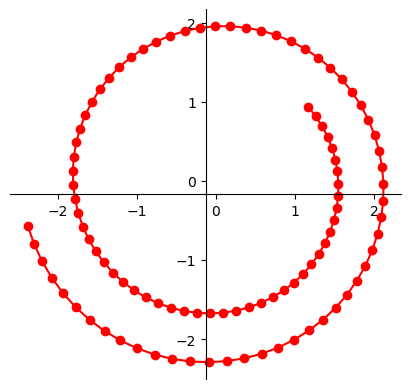

In [87]:
system_history_euler = euler_method_evolution(state_0 = np.array([1.06,1.04]),
                                              end_time=10, timestep= 0.1,
                                              time_derivative= SHM_derivative)
plot_list_of_points_in_2d(system_history_euler[1:])

Clearly, something has gone wrong. The distance from the center, a proxy for the energy of the system, is clearly not conserved!

Maybe the timestep was too large. Re-run the code with smaller timesteps until you get a 0.1% error in energy/radius for one revolution (use what you guessed in the subquestion). Bonus, make a log-log plot of error vs timestep size.

  0%|          | 0/10000 [00:00<?, ?it/s]

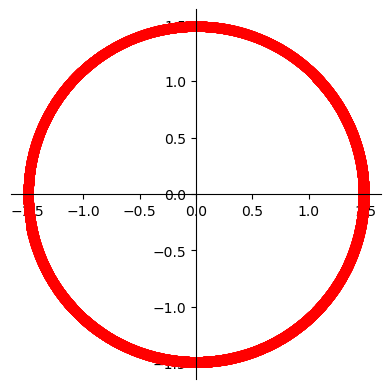

In [88]:
plot_list_of_points_in_2d(euler_method_evolution(state_0 = np.array([1.06,1.04]),
                                                 end_time=10, timestep= 0.001,
                                                 time_derivative= SHM_derivative)[1:])

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/628 [00:00<?, ?it/s]

  0%|          | 0/6280 [00:00<?, ?it/s]

  0%|          | 0/62800 [00:00<?, ?it/s]

Text(0, 0.5, 'Log of error')

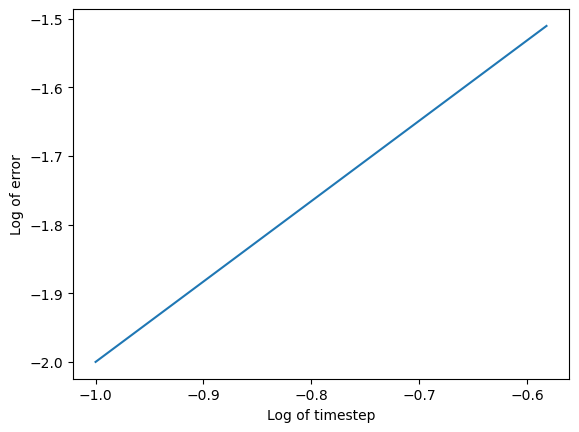

In [51]:
log = []
timestep = 0.1
error = 100

while(error > 0.001):
    state = euler_method_evolution(state_0 = np.array([1.06,1.04]),end_time=6.28, timestep = timestep, time_derivative= SHM_derivative)
    radius_0 = sqrt(state[1][0]**2 + state[1][1]**2)
    radius = sqrt(state[0][0]**2 + state[0][1]**2)
    error = abs(radius - radius_0)/radius
    log.append([log10(timestep), log10(error)])
    timestep = timestep/10.0
    
plt.plot(log[0], log[1])
plt.xlabel("Log of timestep")
plt.ylabel("Log of error")

Let us try to understand what has gone wrong.

Whenever a system has a conserved quantity, there is corresponding constraint on the variables describing the system. This forms a manifold, fancy name for surface of points, where our system can evolve to. Since the differential equations must conserve the quantity and move our system along the manifold, the vector field associated with time evolution must be parallel to the normal of the surface i.e. it must be tangent to the surface.

In general, it must exist in the tangent plane of vectors at the point of our system. Constructing the tangent plane, we see the problem : simply adding the time derivative as in the Euler method moves us along the tangent plane, and the tangent plane doesn't intersect our surface if the surface is curved.

The system is not on the manifold, and conservation is broken.

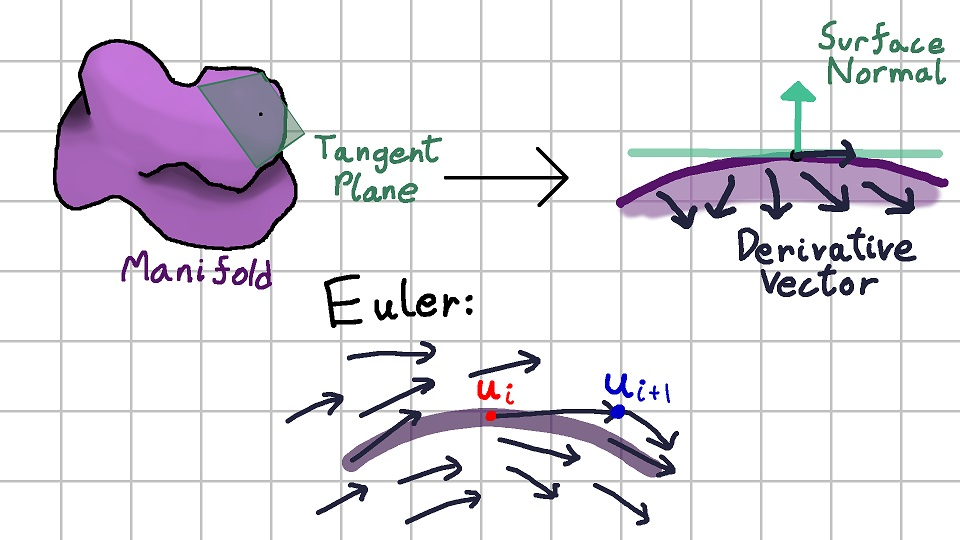

How can we fix this? Well the current equation for the position looks like so : $$x(t + dt) = x(t) + v(t) \cdot dt $$
This looks like the second equation of kinematics, but the acceleration term is missing, and we are certainly accelerating. Adding that, we would get $$x(t + dt) = x(t) + v(t) \cdot dt + \frac{1}{2} a(t) dt^2$$
and we certainly know acceleration, it's $\frac{dv}{dt}$!

### Question 3

Implement this.

In [52]:
def euler_method_but_kinetic_evolution(state_0, end_time, timestep, time_derivative = lambda state : np.zeros_like(state)) :
  """Evolve the system over time differences of `timestep` starting from t=0
     until we reach the target time.
     Return a list of the entire history of the system, containing all states.
     Be sure to keep it a list of lists, e.g. [ [x_0, v_0],
                                                [x_1, v_1],
                                                .... ]
  """
  history = [state_0]

  state = state_0
    
  for i in tqdm(range(int(end_time/timestep))) :
    derivatives = time_derivative(state)
    x = state[0] + derivatives[0]*timestep + 0.5*derivatives[1]*timestep*timestep
    v = state[1] + derivatives[1]*timestep
    history.append([x, v])
    state[0] = x
    state[1] = v     


  return history

  0%|          | 0/100 [00:00<?, ?it/s]

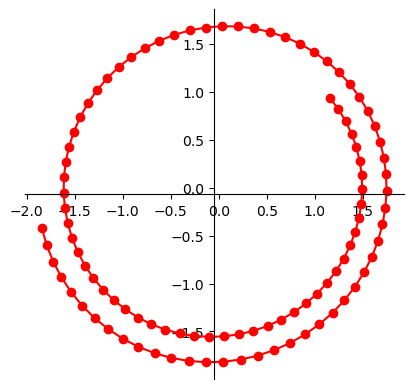

In [54]:
system_history_euler_but_kinetic = euler_method_but_kinetic_evolution(state_0 = np.array([1.06,1.04]),
                                                                      end_time=10, timestep= 0.1,
                                                                      time_derivative= SHM_derivative)
plot_list_of_points_in_2d(system_history_euler_but_kinetic[1:])

It's better, but not by much. Take another look at the equations for x and v :
$$\begin{align}
x(t + dt) &= x(t) + v(t) \cdot dt + \frac{1}{2} a(t) dt^2 \\
&= x(t) + \frac{dx}{dt}(t) \cdot dt + \frac{1}{2} \frac{d^2x}{dt^2}(t) dt^2 \\
v(t) &= v(t) + a(t) \cdot dt \\
&= v(t) + \frac{dv}{dt}(t) \cdot dt
\end{align}$$

They look like Taylor series, second-order for $x$ and first order for $v$. But we can't really extend the one for velocity by adding another term : we don't know what form $\frac{d^2 v}{dt^2}$ will take in general. What a jerk of a problem. The second order extension for $x$ was a bit of hack anyway, one we could use because our problem is actually a second-order DE on $x$; we wouldn't know what to do if we had $\frac{dx}{dt} = f(x,t)$ as our problem.

## Runge-Kutta Methods

However, this Taylor thing is still a promising venture. Is there anyway we can approximate the higher-order derivatives we need?

### Question 4
We are going to solve the problem $\frac{dx}{dt} = f(x,t)$ as an illustrative example. Fill in the blanks of the algebra below. Use the approximation that $f(x+h_1, t +h_2) \simeq f(x,t) + h_1 \partial_x f + h_2 \partial_t f$ for small $h_1$ and $h_2$.

$$\begin{align}
	  x(t+h) &= x(t) + h x'(t) + \frac{h^2}{2} x''(t) \\
	  &= x(t) + h f(x,t) + \frac{h^2}{2} \frac{d}{dt} f(x,t) \\
	  &= x(t) + h f(x,t) + \frac{h^2}{2} \left[ \partial_t f + \partial_x f \cdot \partial_t x\right] \\
	  &= \cdots \\
	  &= \cdots \\
	  &= \cdots \\
    x(t+h) &\simeq x(t) + h \frac{f(x,t) + f(x+hf(x,y), t+h)}{2}
\end{align}$$


#### Answer 4

$$\begin{align}
	  x(t+h) &= x(t) + h x'(t) + \frac{h^2}{2} x''(t) \\
	  &= x(t) + h f(x,t) + \frac{h^2}{2} \frac{d}{dt} f(x,t) \\
	  &= x(t) + h f(x,t) + \frac{h^2}{2} \left[ \partial_t f + \partial_x f \cdot \partial_t x\right] \\
	  &= x(t) + h f(x,t) + \frac{h}{2} \left(f(x + h\partial_t x, t + h) - f(x,t) \right)\\
    x(t+h) &\simeq x(t) + h \frac{f(x,t) + f(x+hf(x,y), t+h)}{2}
\end{align}$$

In the end, we obtain the recursion
$$\begin{align}
	  x_{n+1} &= x_n + \frac{h}{2} (k_1 + k_2)_n \\
	  \text{where } k_1^{(n)} &= f(x_n, t_n) \\
	  k_2^{(n)} &= f\left(x_n + h k_1^{(n)}, t_n + h \right)
	\end{align}$$
This is known as **Runge-Kutta's 2nd order method**, also known as **Heun's method**. It can also be described as a predictor-corrector method. where we use Euler's method to see where we would land, check the derivative at that location, and then come back and use the average as the "correct" shift (also known as the trapezoidal method from integration). Illustration in the image.
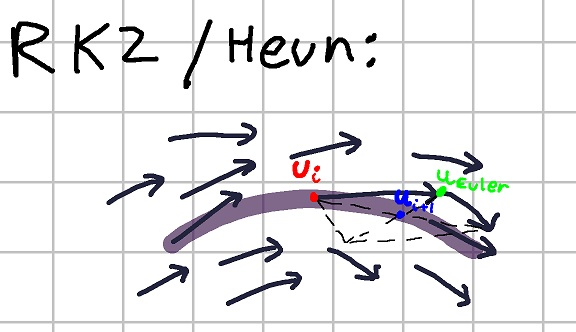

Extending it to two variable case is easy. In fact, it's dead obvious if we upgrade time to also be variable where $\frac{dt}{dt} = 1$.

$$\begin{align}
	  x_{n+1} &= x_n + \frac{h}{2} (k_1 + k_2)_n \\
	  y_{n+1} &= x_n + \frac{h}{2} (l_1 + l_2)_n \\
	  \text{where } k_1^{(n)} &= f_x(x_n, y_n, t_n) \\
	  l_1^{(n)} &= f_y(x_n, y_n, t_n) \\
	  k_2^{(n)} &= f_x\left(x_n + h k_1^{(n)}, y_n + h l_1^{(n)}, t_n + h \right) \\
	  l_2^{(n)} &= f_y\left(x_n + h k_1^{(n)}, y_n + h l_1^{(n)}, t_n + h \right)
	\end{align}$$

### Question 5
Re-implement the mass on a spring system using RK2. Use the same timestep and end_time as the first Euler's method run.

In [80]:
def rk2_evolution(state_0, end_time, timestep, time_derivative = lambda state : np.zeros_like(state)) :
  """This is the "surprise" for which we kept `time_derivative` in a separate function
     and the state in numpy list.
     `time_derivative` is needed for the repeated nesting,
     and numpy lists can have their elements added in a single statement,
     making the code much cleaner.
  """
  history = [state_0]
    
  history = [state_0]
  
  def f(state, offset=None, time=None):
    state_copy = state.copy()
    if (offset is not None):
        state_copy += offset
    return time_derivative(state_copy)

  state = state_0
    
  for i in tqdm(range(int(end_time/timestep))) :
    k1 = f(state)
    k2 = f(state, offset = timestep*k1)
    state_new = state + (timestep/2.0)*(k1 + k2)
    history.append(state_new)
    state = state_new     
    
  return history

  0%|          | 0/100 [00:00<?, ?it/s]

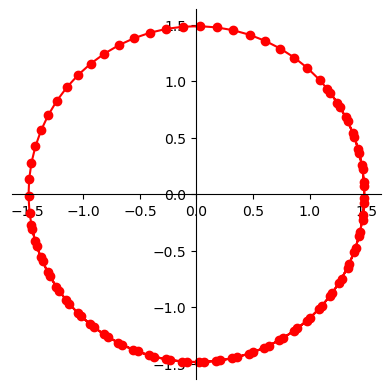

In [81]:
system_history_rk2 = rk2_evolution(state_0 = np.array([1.06,1.04]),
                                   end_time=10, timestep= 0.1,
                                   time_derivative= SHM_derivative)
plot_list_of_points_in_2d(system_history_rk2[1:])

Clearly, the improvements are immense. We get the accuracy of Euler's method at $\Delta t = 10^{-3}$ but at $\Delta t = 10^{-1}$ and using 100x fewer iterations. This is expected, first-order Taylor series have an error on the order of $O(h^2)$ while the second-order series we derived RK2 from has an error of $O(h^3)$,

But why stop at 2nd order? We must go... even further beyond!

We'll spare you the algebraic bloodbath, but behold, **Runge-Kutta's 4th order method**!

$$\begin{align}
	  \vec x_{n+1} &= \vec x_n + h \left(\frac{\vec k_1 + 2\vec k_2 + 2 \vec k_3 + \vec k_4}{6}\right)_n \\
	  \text{where } \vec k_1^{(n)} &= f(\vec x_n, t_n) \\
	  \vec k_2^{(n)} &= f\left(\vec x_n + \frac{h}{2} \vec k_1^{(n)}, t_n + \frac{h}{2}\right) \\
	  \vec k_3^{(n)} &= f\left(\vec x_n + \frac{h}{2} \vec k_2^{(n)}, t_n + \frac{h}{2}\right) \\
	  \vec k_4^{(n)} &= f\left(\vec x_n + h \vec k_3^{(n)}, t_n + h\right)
	\end{align}$$

We have packaged multiple variables into a single vector for brevity. Why stop at 4th? Even if every increase in order increases nesting but decreases the number of iterations to compensate, one still has other constraints on how large $\Delta t$ can be, such as visuals or inspecting a system across time. Folk wisdom says that anything beyond is overkill, most computers only have 7 decimals of relative accuracy, and even if the error exists, it needs to be noticeable to deserve action.



### Question 6
One final time, re-implement the mass on a spring system using RK4.

In [62]:
def rk4_evolution(state_0, end_time, timestep, time_derivative = lambda state : np.zeros_like(state)) :
  """This is the "surprise" for which we kept `time_derivative` in a separate function
     and the state in numpy list.
     `time_derivative` is needed for the repeated nesting,
     and numpy lists can have their elements added in a single statement,
     making the code much cleaner.
  """
  history = [state_0]
  
  def f(state, offset=None, time=None):
    state_copy = state.copy()
    if (offset is not None):
        state_copy += offset
    return time_derivative(state_copy)

  state = state_0
    
  for i in tqdm(range(int(end_time/timestep))) :
    k1 = f(state)
    k2 = f(state, offset = 0.5*timestep*k1)
    k3 = f(state, offset = 0.5*timestep*k2)
    k4 = f(state, offset = timestep*k3)
    state_new = state + (timestep/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    history.append(state_new)
    state = state_new    

  return history

  0%|          | 0/100 [00:00<?, ?it/s]

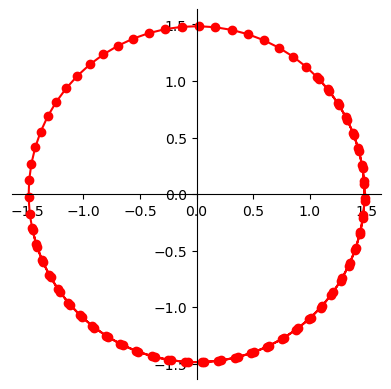

In [63]:
system_history_rk4 = rk4_evolution(state_0 = np.array([1.06,1.04]),
                                   end_time=10, timestep= 0.1,
                                   time_derivative= SHM_derivative)
plot_list_of_points_in_2d(system_history_rk4)

The circle is very ... circle. Let's move on to more interesting problems.

## Van der Pol Oscillator
Concieved by Balthasar van der Pol using vaccum tube circuits, this self-starting oscillator is used to model neuron activations and geological faults. This can be described using the following second-order DE where an SHM has variable anti-damping/ fixed self-driving but variable damping : $$\frac{d^2x}{dt^2} - \mu (1-x^2) \frac{dx}{dt} + x = 0$$
It can be transformed to the following two-variable system by the transformation $y = x - \frac{1}{3}x^3 - \frac{\dot{x}}{\mu}$ :
$$\begin{align}
\dot x &= \mu \left( x - \frac{1}{3} x^3 - y\right) \\
\dot y &= \frac{x}{\mu}
\end{align}$$

### Question 7
Implement the above for $\mu = 7$, using Euler's method. For simpler code, rename `time_derivative` to `SHM_derivative` above and re-implement your `euler`, `rk2`, and `rk4` functions to accept a function that gives the derivative as a variable. You can simply pass functions as variables, as illustrated in the example below

In [67]:
"""
How to pass functions as variables :
def f(x) :
  return x**2
def doubler(function_to_be_doubled,x) :
  return function_to_be_doubled(function_to_be_doubled(x))

# so
doubler(f,2)
# returns (2**2) **2 = 16
"""
def vanDerPolDerivative(state, time=None) :
  x = state[0]
  y = state[1]
  mu = 7

  dx_dt = mu*(x-(1.0/3.0)*x**3 - y)
  dy_dt = x/mu

  slope = np.array([dx_dt, dy_dt])
  return slope

In [68]:
def plot_list_of_points_in_2d_and_components(list_of_points, extra_plot = None) : # Setup the plot
  fig, (ax1,ax2,ax3) = plt.subplots(3, figsize=(15, 15))
  center_and_equalize_axes(ax1)

  list_of_points = np.vstack(list_of_points)

  ax1.set_title("2D evolution")
  ax1.plot(list_of_points[:,0], list_of_points[:,1], '-ro')
  # Added for illustration
  if extra_plot != None :
    ax1.plot(extra_plot[0], extra_plot[1], 'b')

  ax2.set_title("x v time")
  ax2.plot(list_of_points[:,0], '-go')
  ax3.set_title("y v time")
  ax3.plot(list_of_points[:,1], '-bo')
  plt.show()

  0%|          | 0/200 [00:00<?, ?it/s]

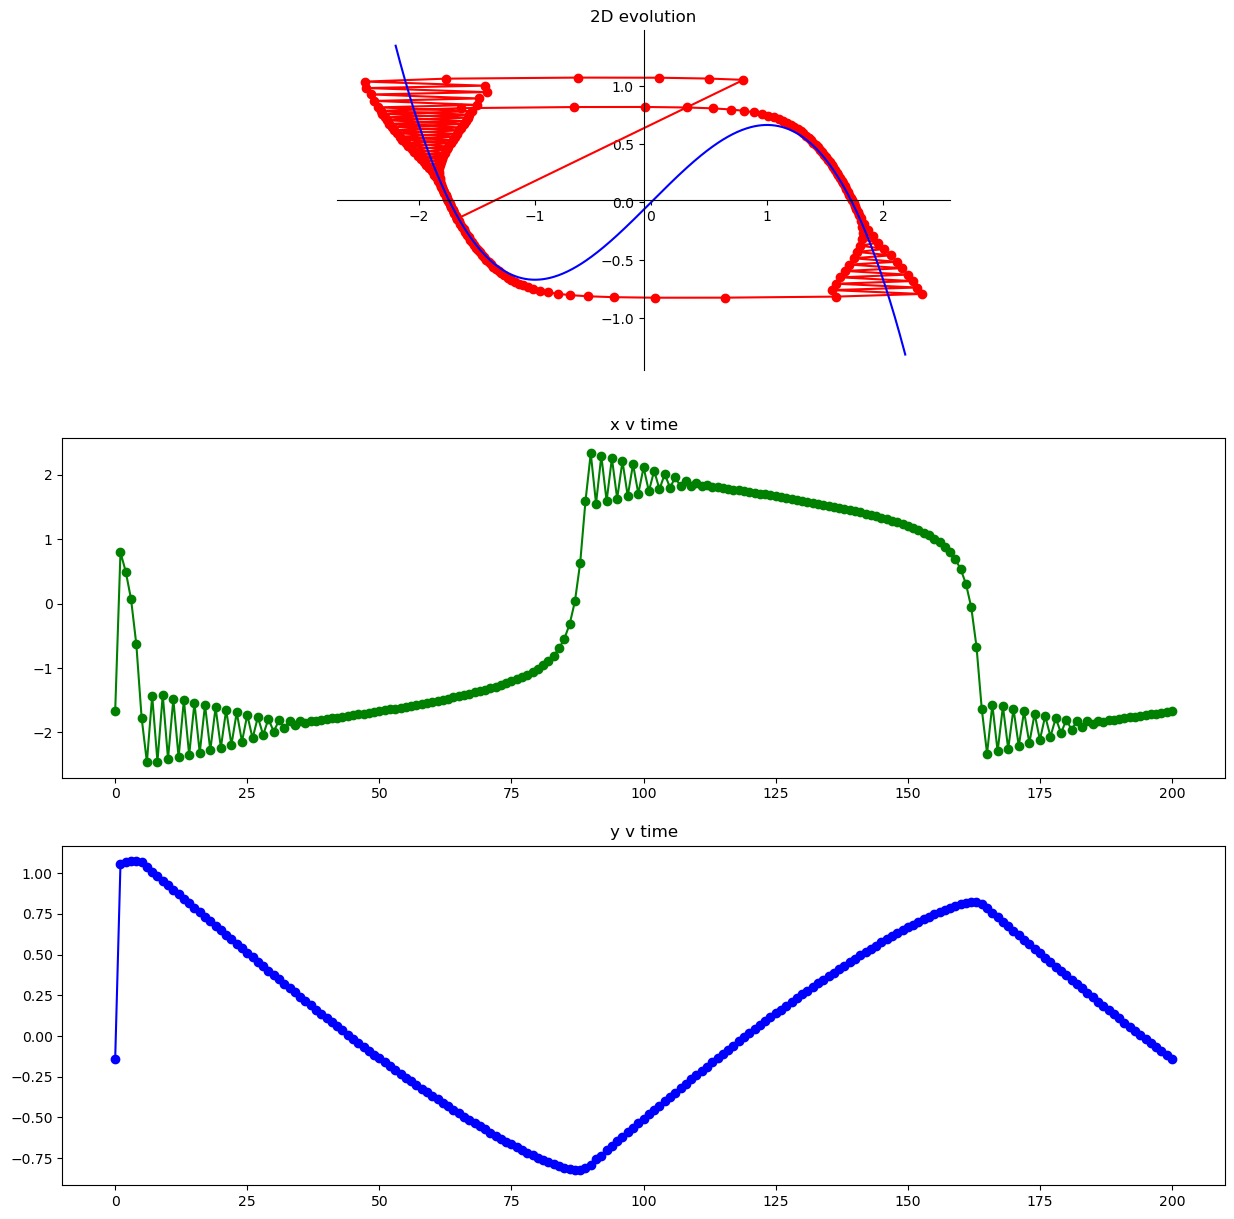

In [69]:
system_history_euler_vanderPol = euler_method_evolution(state_0 = np.array([1.06,1.04]),
                                                        end_time=20, timestep= 0.1,
                                                        time_derivative= vanDerPolDerivative)

plotting_x = np.arange(-2.2,2.2,0.01)
plot_list_of_points_in_2d_and_components(system_history_euler_vanderPol, extra_plot=[plotting_x, plotting_x - plotting_x**3 / 3])

There is a lot of bouncing happening when the point reaches the branches of the cubic. Is that actually part of the dynamics of the system, or an aritfact from numerical approximations?

Copy the code above and edit it to use the RK2 and RK4 methods, in different cells. If you want to do it in the same cell, you'll have to edit the plotting system. We encourage it, it doesn't bite!

  0%|          | 0/200 [00:00<?, ?it/s]

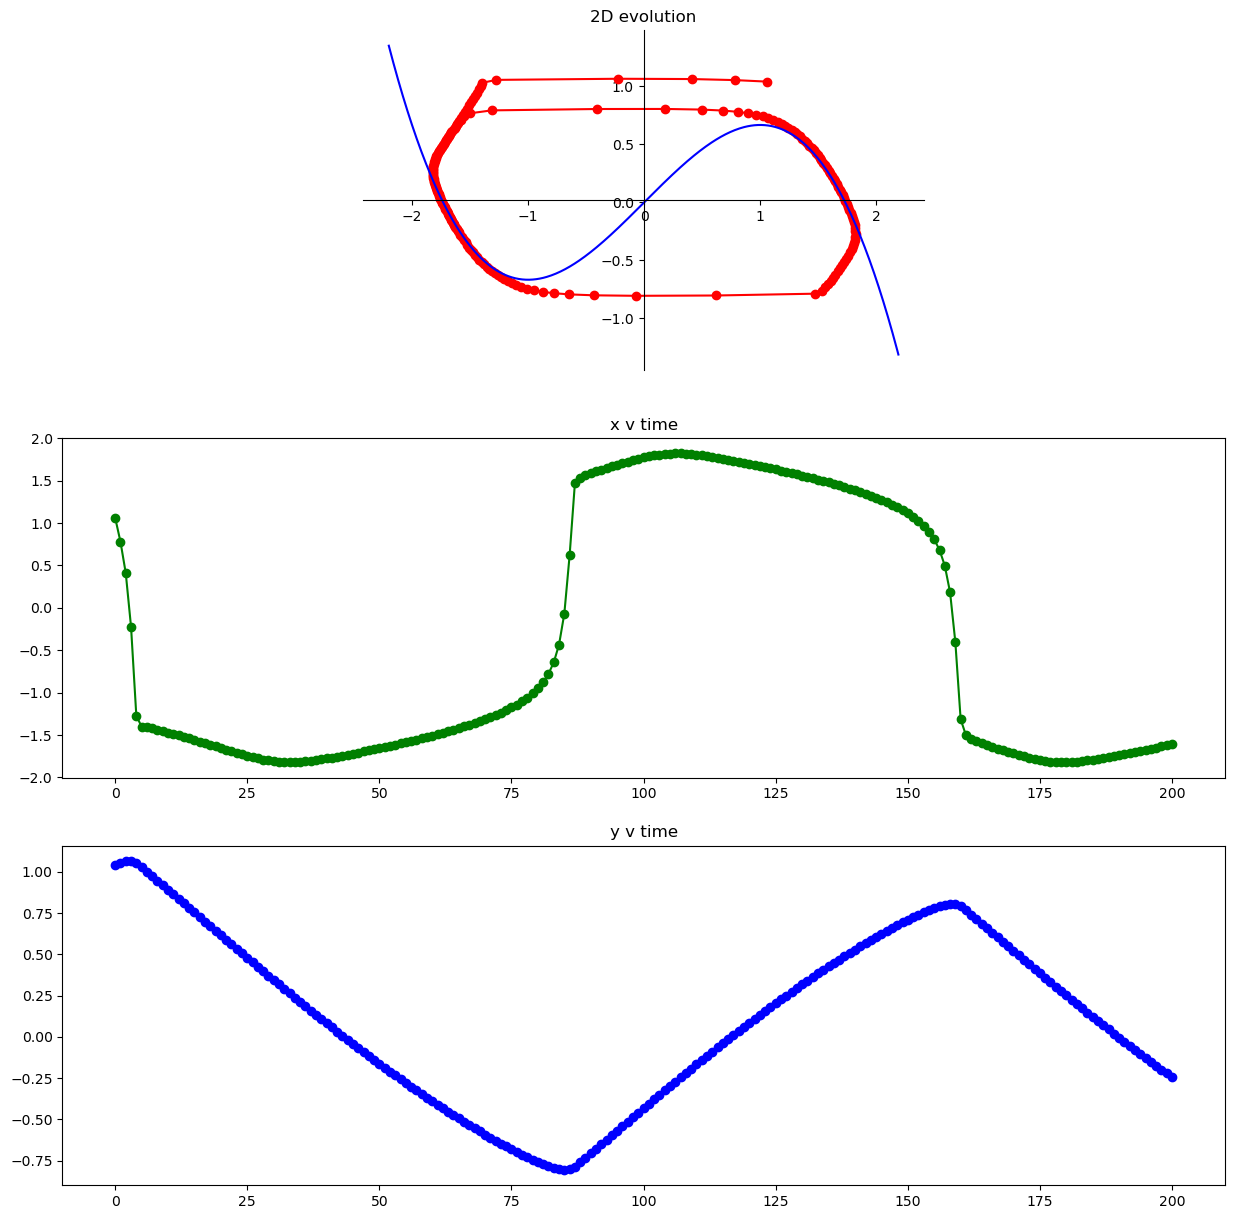

In [82]:
# do van der Pol with RK2
system_history_rk2_vanderPol = rk2_evolution(state_0 = np.array([1.06,1.04]),
                                             end_time=20, timestep= 0.1,
                                             time_derivative= vanDerPolDerivative)

plotting_x = np.arange(-2.2,2.2,0.01)
plot_list_of_points_in_2d_and_components(system_history_rk2_vanderPol, extra_plot=[plotting_x, plotting_x - plotting_x**3 / 3])

  0%|          | 0/200 [00:00<?, ?it/s]

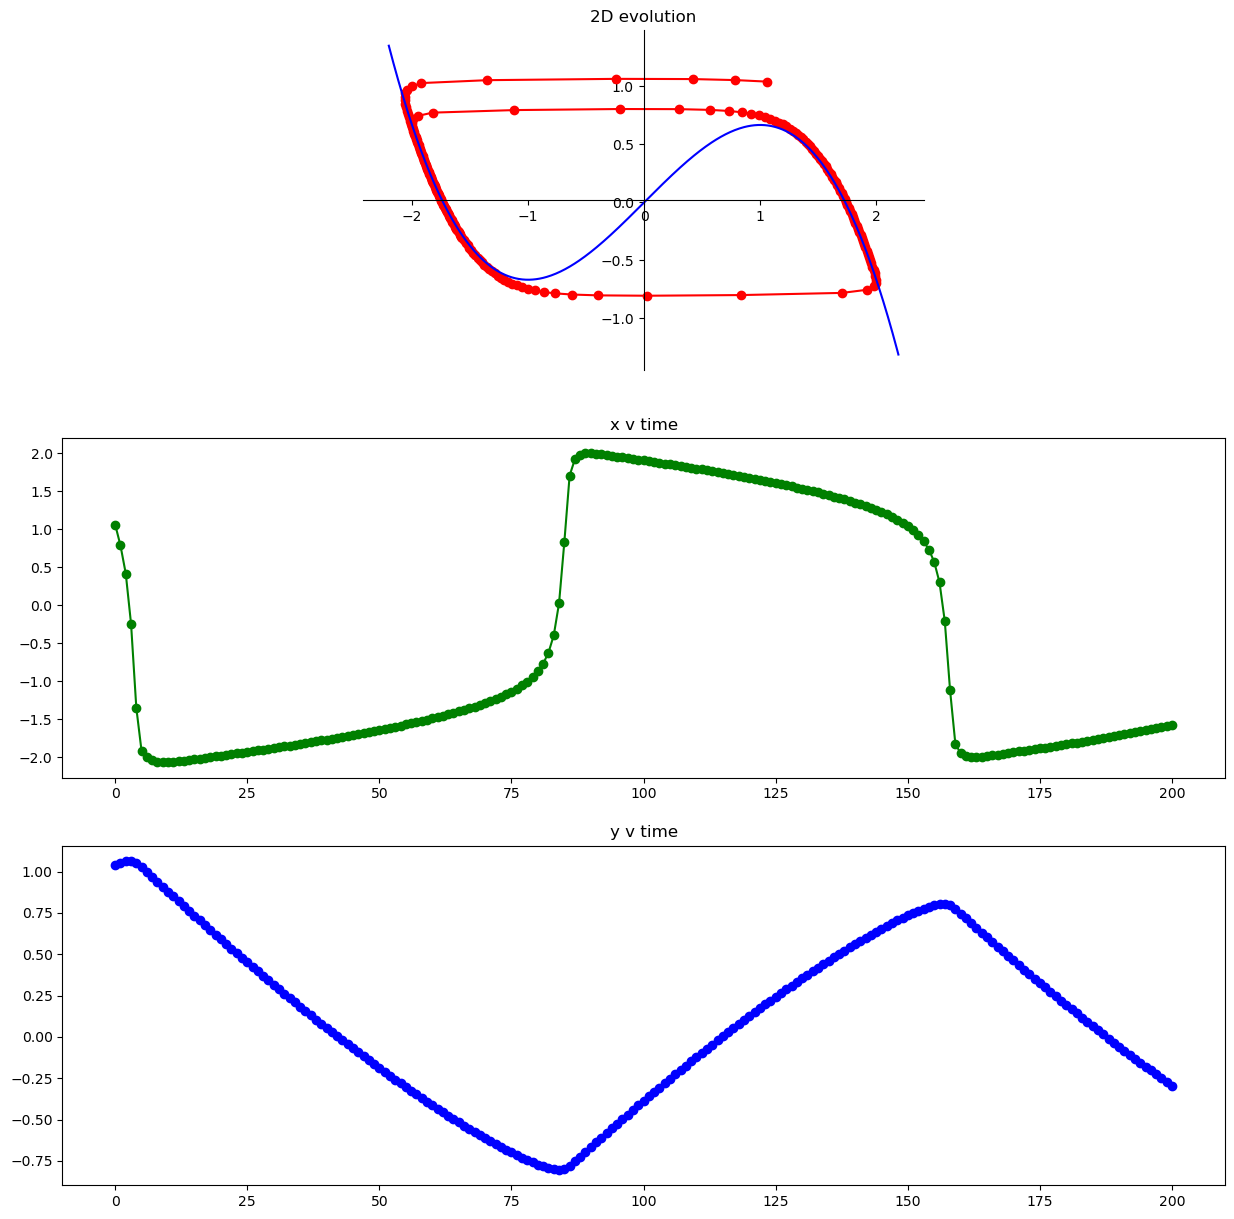

In [83]:
# Do van der Pol with RK4
system_history_rk4_vanderPol = rk4_evolution(state_0 = np.array([1.06,1.04]),
                                             end_time=20, timestep= 0.1,
                                             time_derivative= vanDerPolDerivative)
system_history_rk4_vanderPol = np.vstack(system_history_rk4_vanderPol)

plotting_x = np.arange(-2.2,2.2,0.01)
plot_list_of_points_in_2d_and_components(system_history_rk4_vanderPol, extra_plot=[plotting_x, plotting_x - plotting_x**3 / 3])

Clearly, it was [ringing](https://en.wikipedia.org/wiki/Ringing_(signal)) induced from the inaccuracy of our numerical method.

As you also saw, RK2 also had some errors, where the point would "enter mud" (the best way I can describe it) and proceed slowly along a weird direction before it is anywhere even close to the cubic. The reason is clear if we look at the predictor-corrector point of view :
- Near the cubic on the fast-side of oscillation, the $\frac{dx}{dt}$ derivative is fairly large for our choice of $\mu$.
- Euler's method thus predicts a point that far away - it's actually on the other side of the cubic, where the sign of the derivative flips.
- Thus the corrector trapezoidal method averages the two and concludes that $\frac{dx}{dt}$ is actually small.

This is why higher accuracy methods are needed for proper analysis.

## Lorentz System and Strange Attractor
The best way to see the errors are in a system that is highly sensitive to them - it's time for chaos! We will implementing the classic Lorentz system. It is given by the following set of equations :
$$
  \frac{dx}{dt} = \sigma(y-x) \\
  \frac{dy}{dt} = x(\rho-z) - y \\
  \frac{dz}{dt} = xy - \beta z \\
$$
$\sigma, \rho, \beta$ control the characteristics of the system.

### Question 8 (Final Question)
Using the standard values of $\sigma = 10, \beta = \frac{8}{3}, \rho = 28$, implement Euler, RK2 and RK4 simultaneously. We shall plot these simultaneously and observe the divergence. Use $(20,20,40)$ as the starting point, so that Euler and RK2 don't diverge.


In [75]:
def LorentzAttractorDerivative(state, time=None) :
  x = state[0]
  y = state[1]
  z = state[2]
  sigma = 10
  beta = 8/3
  rho = 28

  # Fill these in
  dx_dt = sigma*(y-x)
  dy_dt = x*(rho-z)-y
  dz_dt = x*y - beta*z

  slope = np.array([dx_dt, dy_dt, dz_dt])
  return slope

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

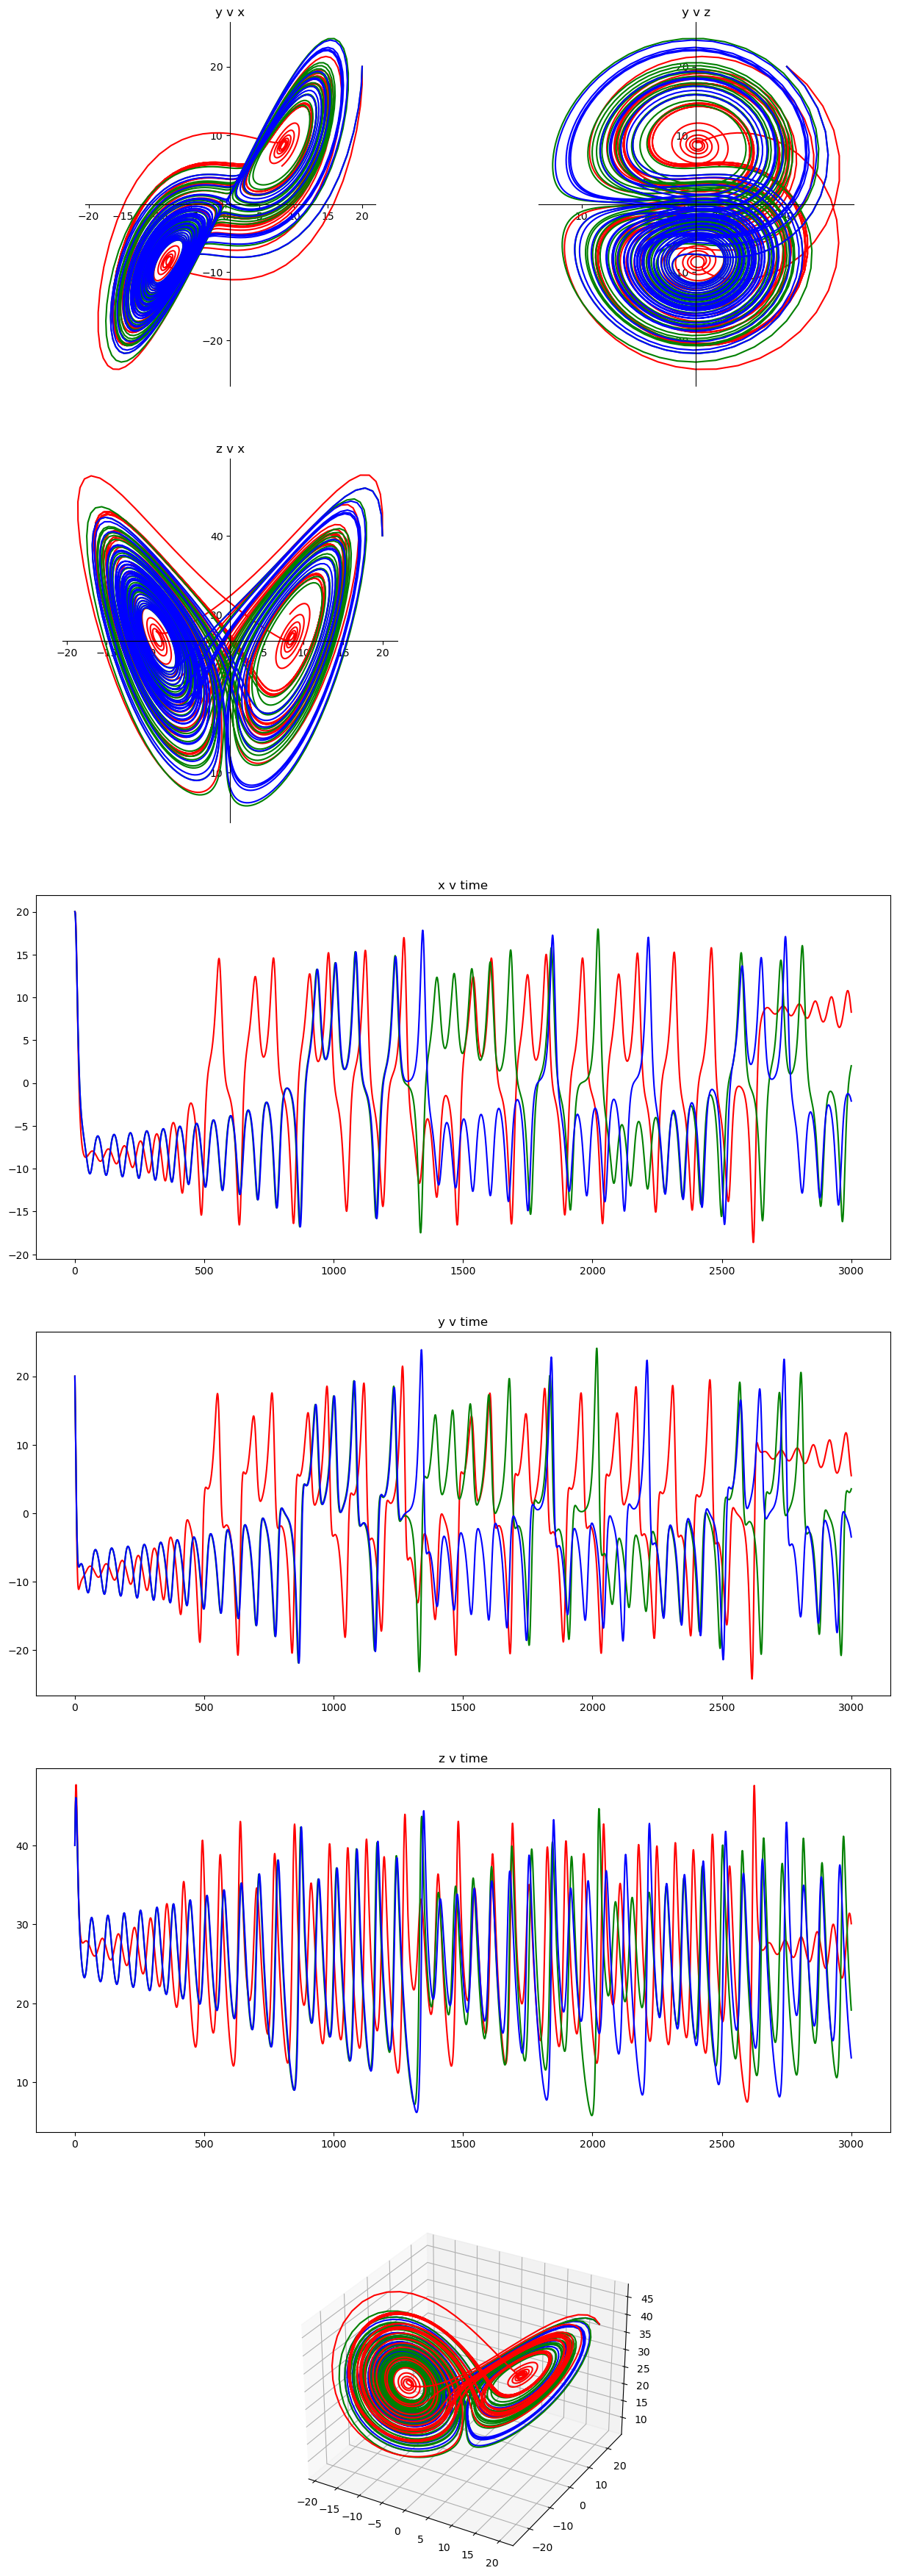

In [89]:
system_history_euler_Lorentz = euler_method_evolution(state_0 = np.array([20.,20.,40.]),
                                                      end_time=30, timestep= 0.01,
                                                      time_derivative= LorentzAttractorDerivative)

system_history_rk2_Lorentz = rk2_evolution(state_0 = np.array([20.,20.,40.]),
                                           end_time=30, timestep= 0.01,
                                           time_derivative= LorentzAttractorDerivative)

system_history_rk4_Lorentz = rk4_evolution(state_0 = np.array([20.,20.,40.]),
                                           end_time=30, timestep= 0.01,
                                           time_derivative= LorentzAttractorDerivative)

fig = plt.figure(figsize=(15, 15 * 3))

ax_xy = fig.add_subplot(6, 2, 1)
ax_yz = fig.add_subplot(6, 2, 2)
ax_xz = fig.add_subplot(6, 2, 3)
center_and_equalize_axes(ax_xy)
center_and_equalize_axes(ax_yz)
center_and_equalize_axes(ax_xz)

ax_x = fig.add_subplot(6, 1, 3)
ax_y = fig.add_subplot(6, 1, 4)
ax_z = fig.add_subplot(6, 1, 5)

system_history_euler_Lorentz = np.array(system_history_euler_Lorentz)
system_history_rk2_Lorentz = np.vstack(system_history_rk2_Lorentz)
system_history_rk4_Lorentz = np.vstack(system_history_rk4_Lorentz)

ax_xy.set_title("y v x")
ax_yz.set_ylabel("y")
ax_yz.set_xlabel("x")
ax_xy.plot(system_history_euler_Lorentz[:,0], system_history_euler_Lorentz[:,1], 'r')
ax_xy.plot(system_history_rk2_Lorentz[:,0], system_history_rk2_Lorentz[:,1], 'g')
ax_xy.plot(system_history_rk4_Lorentz[:,0], system_history_rk4_Lorentz[:,1], 'b')

ax_yz.set_title("y v z")
ax_yz.set_ylabel("y")
ax_yz.set_xlabel("z")
ax_yz.plot(system_history_euler_Lorentz[:,2], system_history_euler_Lorentz[:,1], 'r')
ax_yz.plot(system_history_rk2_Lorentz[:,2], system_history_rk2_Lorentz[:,1], 'g')
ax_yz.plot(system_history_rk4_Lorentz[:,2], system_history_rk4_Lorentz[:,1], 'b')

ax_xz.set_title("z v x")
ax_yz.set_ylabel("z")
ax_yz.set_xlabel("x")
ax_xz.plot(system_history_euler_Lorentz[:,0], system_history_euler_Lorentz[:,2], 'r')
ax_xz.plot(system_history_rk2_Lorentz[:,0], system_history_rk2_Lorentz[:,2], 'g')
ax_xz.plot(system_history_rk4_Lorentz[:,0], system_history_rk4_Lorentz[:,2], 'b')

ax_x.set_title("x v time")
ax_x.plot(system_history_euler_Lorentz[:,0], 'r')
ax_x.plot(system_history_rk2_Lorentz[:,0], 'g')
ax_x.plot(system_history_rk4_Lorentz[:,0], 'b')

ax_y.set_title("y v time")
ax_y.plot(system_history_euler_Lorentz[:,1], 'r')
ax_y.plot(system_history_rk2_Lorentz[:,1], 'g')
ax_y.plot(system_history_rk4_Lorentz[:,1], 'b')

ax_z.set_title("z v time")
ax_z.plot(system_history_euler_Lorentz[:,2], 'r')
ax_z.plot(system_history_rk2_Lorentz[:,2], 'g')
ax_z.plot(system_history_rk4_Lorentz[:,2], 'b')

ax_3d = fig.add_subplot(6,1,6, projection='3d')
ax_3d.plot(system_history_rk4_Lorentz[:,0], system_history_rk4_Lorentz[:,1], system_history_rk4_Lorentz[:,2], 'b')
ax_3d.plot(system_history_rk2_Lorentz[:,0], system_history_rk2_Lorentz[:,1], system_history_rk2_Lorentz[:,2], 'g')
ax_3d.plot(system_history_euler_Lorentz[:,0], system_history_euler_Lorentz[:,1], system_history_euler_Lorentz[:,2], 'r')

plt.show()

We can see the Euler method diverges basically immediately, while RK2 stays together for about 1.3k iterations, 13 seconds, but after that it still diverges. This further illustrates the need of high-precision numerical methods when dealing with sensitive systems.

# ---End of Assignment---

The last section on Reaction-Diffusion systems is an illustrative example of applying the time-evolution methods to a system of significance.

## Reaction-Diffusion systems
Ok, now that we have pretty even grasp on time-evolution methods, let's end big : from a 3-variable system to $N^2$-variable system of chemicals in a dish.

Commonly known as reaction-diffusion systems, we fill a dish full of chemicals where they are allowed to diffuse from higher-concentration regions to lower concentration regions (so $D_t \phi = \nabla^2 \phi$) while simultanosuly reacting with other chemical species in their region (so $D_t \phi_a = f_a(\phi_a,\phi_b), D_t \phi_b = f_b(\phi_a,\phi_b)$).

However, we will be not actually be simulating chemicals, but rather predator and prey populations! Just like, chemicals they move around, and "react" (such is the circle of life), but we don't take them to be territorial so they shouldn't really be "repelled" by each other or be randomly walking to new places, which is what is implied by the spreading out effect of diffusion.

What we want is the predator to be drawn towards higher concentrations of prey and prey to be driven away from higher concentrations of prey.

For the base of predator-prey "reactions", we will use the Lotka-Volterra model :
$$
\newcommand{\fox}{🦊}
\newcommand{\rabbit}{🐇}
\frac{d\rabbit}{dt} = \alpha \rabbit - \beta \rabbit \cdot \fox \\
\frac{d\fox}{dt} = \delta \rabbit \cdot \fox -  \gamma \fox\\
$$
Where $\alpha$ is the $\rabbit$'s birth rate, $\gamma$ is the $\fox$'s death rate (we don't expect $\rabbit$s to die of natural causes), and $\beta$ and $\delta$ can be thought of how the act of predation affects both populations. To complete the food web, one can suppose that the 🌾 that the $\rabbit$ "predates" upon is assumed to plentiful and not affected much, thus absorbed into the constant $\alpha$.

For the diffusion effect, let us take inspiration from EM's continuity equation relating charge and current.
$$\begin{align}
 & D_t \rabbit_\text{migration} + \nabla J_\rabbit = 0, \\
  \text{ but } J_\rabbit &= -v_\rabbit \nabla \rabbit \\
  &\text{Meaning "Go in the opposite direction of increasing 🐇"} \\
  \implies &D_t \rabbit_\text{migration} = v_\rabbit \nabla^2 \rabbit \\
  \text{Similarly, } \implies &D_t \fox_\text{migration} = v_\fox \nabla^2 \fox \\
\end{align}$$

Where $v$ can be interpreted as the speed of the creature. Thus, putting it together, we get the final set of equations as
$$
\frac{d\rabbit}{dt} = \alpha \rabbit - \beta \rabbit \cdot \fox +  v_\rabbit \nabla^2 \rabbit \\
\frac{d\fox}{dt} = \delta \rabbit \cdot \fox - \gamma \fox + v_\fox \nabla^2 \fox\\
$$it\\
$$


In [94]:
def laplacian2D(state) :
  laplacian = np.zeros_like(state)

  for i,j in np.ndindex(state.shape) :
    laplacian[i,j] += (-4 * state[i,j]
                    + (0 if i <= 0                  else state[i-1,j])
                    + (0 if i >= state.shape[0] - 1 else state[i+1,j])
                    + (0 if j <= 0                  else state[i,j-1])
                    + (0 if j >= state.shape[1] - 1 else state[i,j+1]))

  return laplacian

def LotkaVolterra_Derivative(state, time=None) :
  rabbit_pop = state[0]
  fox_pop = state[1]
  # coeffs stolen from https://github.com/ifilot/turing
  rabbit_birth = 2.333
  fox_death = 1
  rabbit_predation = 2.666
  fox_predation = 1
  drabbit_dt = rabbit_birth * rabbit_pop - rabbit_predation * rabbit_pop * fox_pop
  dfox_dt    = - fox_death * fox_pop + fox_predation * rabbit_pop * fox_pop

  slope = np.array([drabbit_dt, dfox_dt])

  return slope

def LotkaVolterraDiffusion_Derivative(state, time=None) :
  rabbit_pop = state[0]
  fox_pop = state[1]
  # coeffs stolen from https://github.com/ifilot/turing
  rabbit_birth = 2.333
  fox_death = 1
  rabbit_predation = 2.666
  fox_predation = 1
  rabbit_speed = 1e-5
  fox_speed = 1e-5
  del_x = 0.05

  drabbit_dt = (rabbit_speed / del_x**2) * laplacian2D(fox_pop) \
             + rabbit_birth * rabbit_pop - rabbit_predation * rabbit_pop * fox_pop
  dfox_dt   = -(fox_speed / del_x**2) * laplacian2D(rabbit_pop) \
             - fox_death * fox_pop + fox_predation * rabbit_pop * fox_pop

  slope = np.array([drabbit_dt, dfox_dt])

  return slope

In [95]:
# source https://stackoverflow.com/a/42154921/5883337

def perlin(x, y, seed=0):
    # permutation table
    np.random.seed(seed)
    p = np.arange(256, dtype=int)
    np.random.shuffle(p)
    p = np.stack([p, p]).flatten()
    # coordinates of the top-left
    xi, yi = x.astype(int), y.astype(int)
    # internal coordinates
    xf, yf = x - xi, y - yi
    # fade factors
    u, v = fade(xf), fade(yf)
    # noise components
    n00 = gradient(p[p[xi] + yi], xf, yf)
    n01 = gradient(p[p[xi] + yi + 1], xf, yf - 1)
    n11 = gradient(p[p[xi + 1] + yi + 1], xf - 1, yf - 1)
    n10 = gradient(p[p[xi + 1] + yi], xf - 1, yf)
    # combine noises
    x1 = lerp(n00, n10, u)
    x2 = lerp(n01, n11, u)  # FIX1: I was using n10 instead of n01
    return lerp(x1, x2, v)  # FIX2: I also had to reverse x1 and x2 here

def lerp(a, b, x):
    "linear interpolation"
    return a + x * (b - a)

def fade(t):
    "6t^5 - 15t^4 + 10t^3"
    return 6 * t**5 - 15 * t**4 + 10 * t**3

def gradient(h, x, y):
    "grad converts h to the right gradient vector and return the dot product with (x,y)"
    vectors = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
    g = vectors[h % 4]
    return g[:, :, 0] * x + g[:, :, 1] * y

# EDIT : generating noise at multiple frequencies and adding them up
def get_noise_map(width, height, octaves = 1, base_freq = 1) :
  seed = np.random.randint(0,2**16)
  p = np.zeros((100,100))
  for i in range(octaves):
    freq = 2**i * base_freq
    lin = np.linspace(0, freq, 100, endpoint=False)
    x, y = np.meshgrid(lin, lin)  # FIX3: I thought I had to invert x and y here but it was a mistake
    p = perlin(x, y, seed=seed) / freq + p
  return p

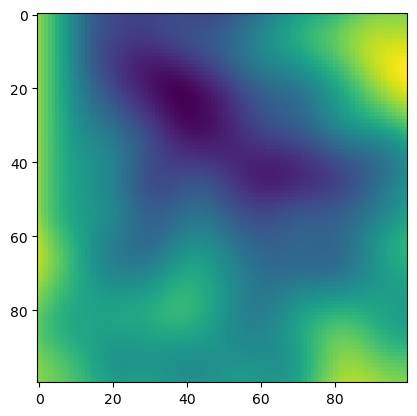

In [96]:
plt.imshow(get_noise_map(256,256,octaves=3), origin='upper')
plt.show()

In [105]:
N = 128
# Random start
initial_state = np.random.rand(2,N,N) * 1.4 + 0.3
# Perlin start
initial_state = np.array([get_noise_map(N,N,octaves=3, base_freq = 1), get_noise_map(N,N,octaves=3, base_freq = 1)]) * 0.7 + 1.3
# Circle start
initial_state = np.zeros((2,N,N))
for i,j in np.ndindex((N,N)) :
  if (i - N/2) **2 + (j - N/2) ** 2 < (N/3)**2 :
    initial_state[0,i,j] = 1
  else :
    initial_state[1,i,j] = 1

system_history_diffusiveLotkaVolterra = rk4_evolution(state_0 = initial_state,
                                                      end_time=10, timestep= 0.01,
                                                      time_derivative= LotkaVolterraDiffusion_Derivative)

  0%|          | 0/1000 [00:00<?, ?it/s]

C:\Users\Apurv\AppData\Local\Temp\ipykernel_21052\616386027.py:41: RuntimeWarning: overflow encountered in multiply
  + rabbit_birth * rabbit_pop - rabbit_predation * rabbit_pop * fox_pop
C:\Users\Apurv\AppData\Local\Temp\ipykernel_21052\616386027.py:43: RuntimeWarning: overflow encountered in multiply
  - fox_death * fox_pop + fox_predation * rabbit_pop * fox_pop
C:\Users\Apurv\AppData\Local\Temp\ipykernel_21052\616386027.py:42: RuntimeWarning: invalid value encountered in add
  dfox_dt   = -(fox_speed / del_x**2) * laplacian2D(rabbit_pop) \


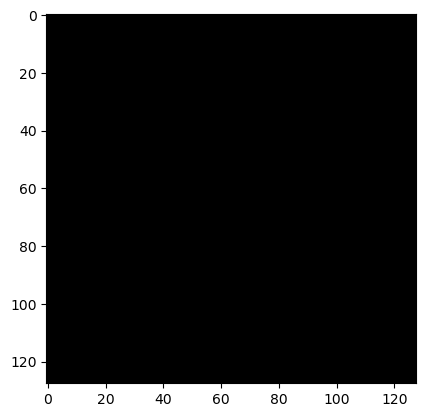

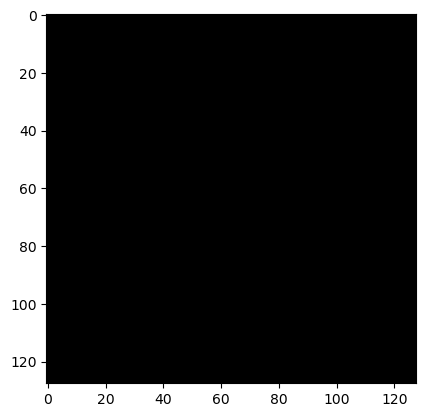

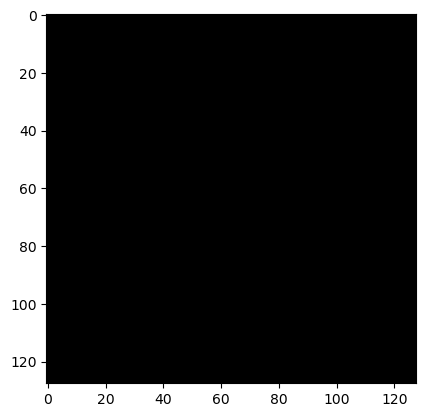

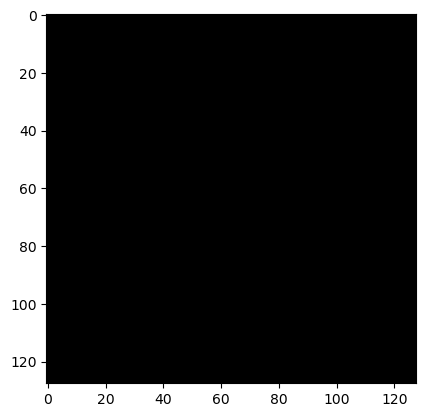

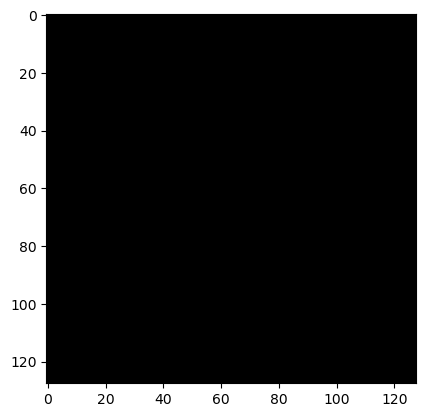

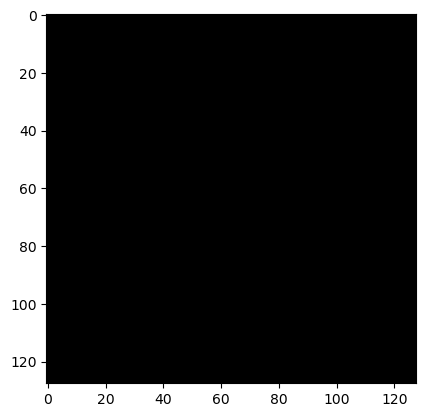

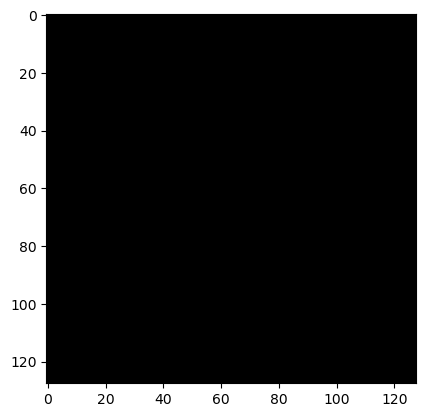

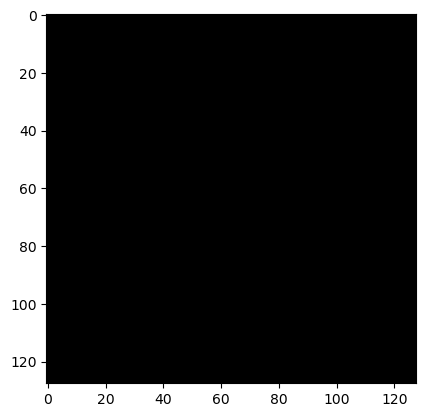

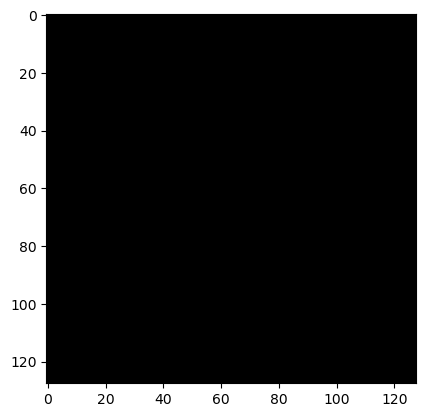

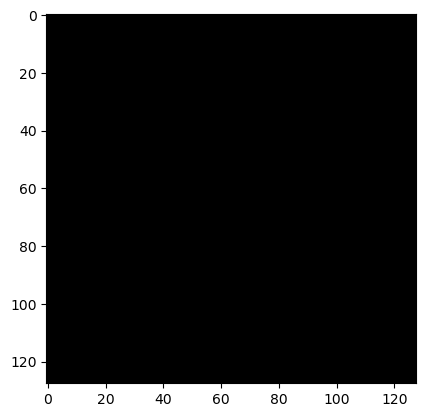

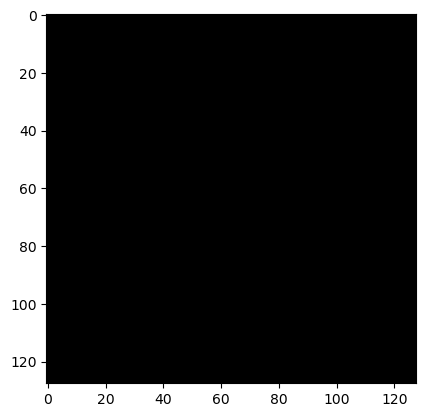

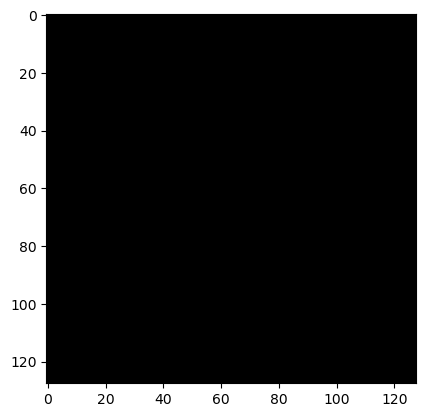

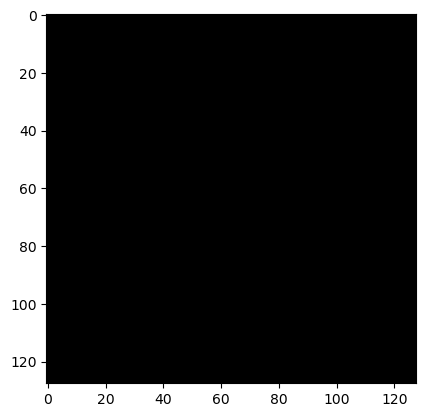

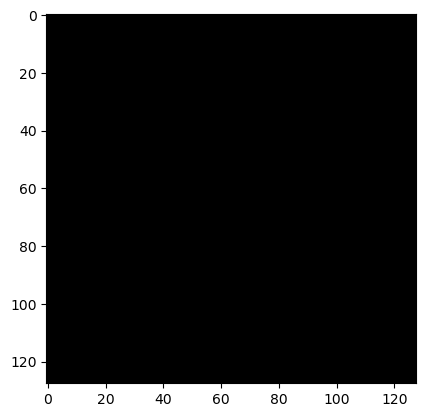

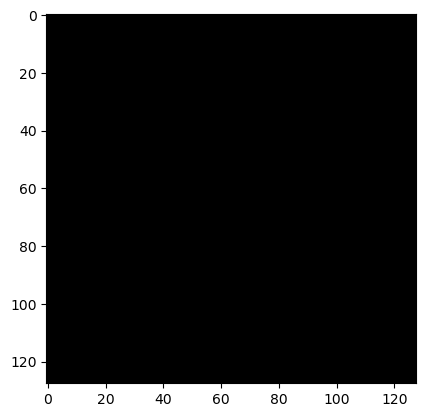

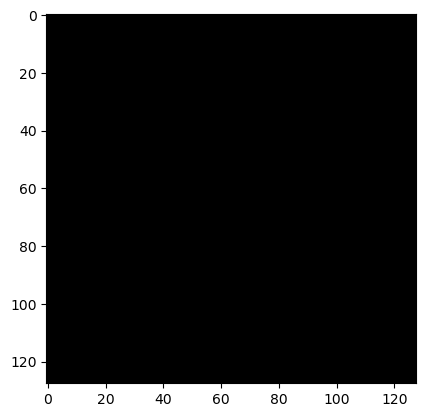

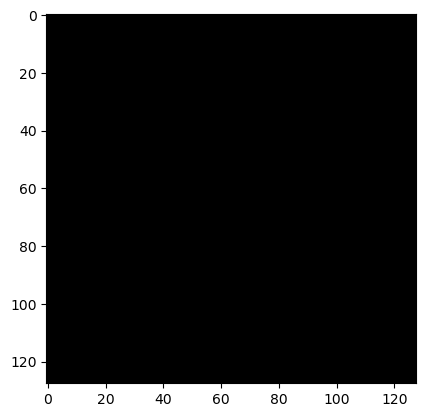

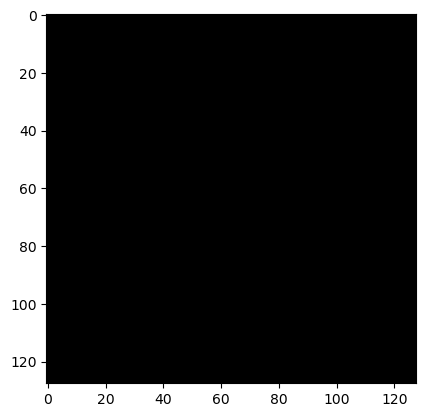

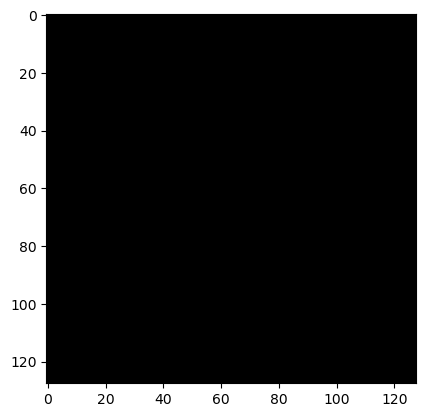

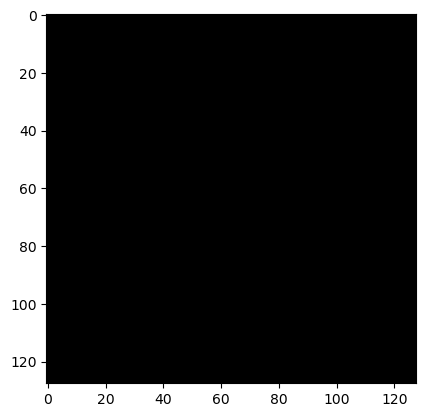

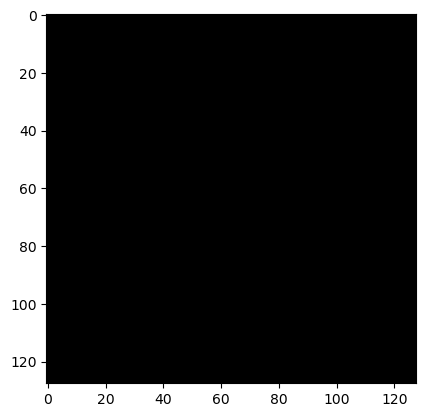

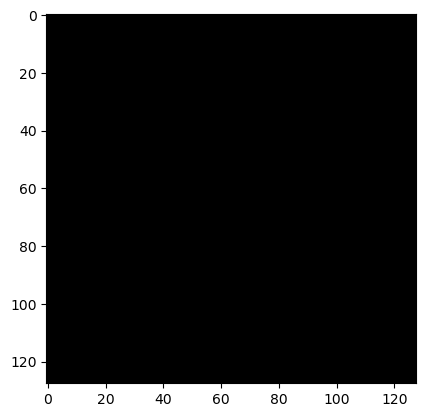

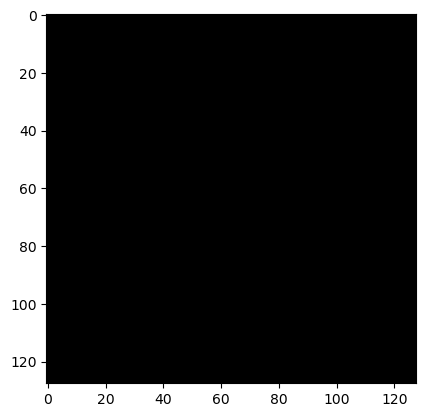

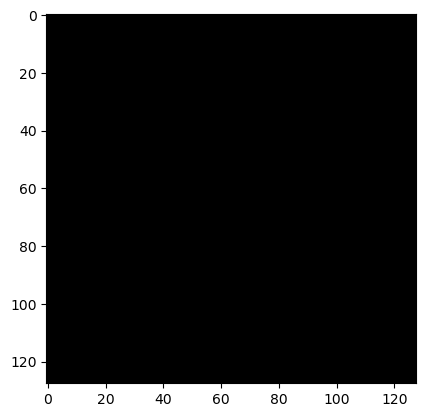

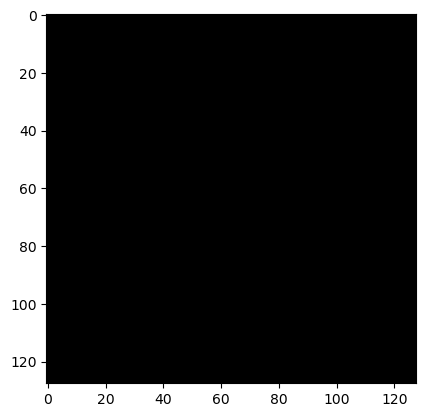

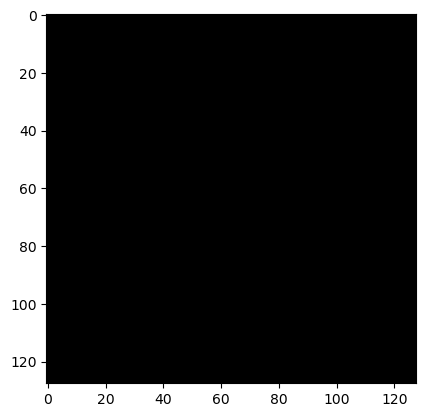

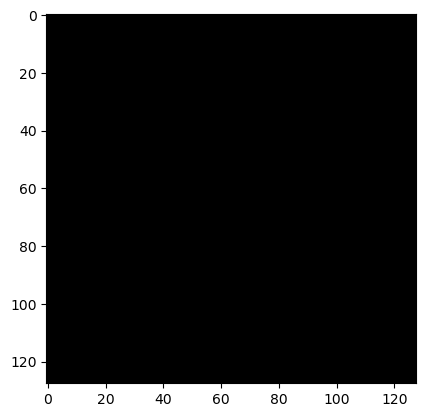

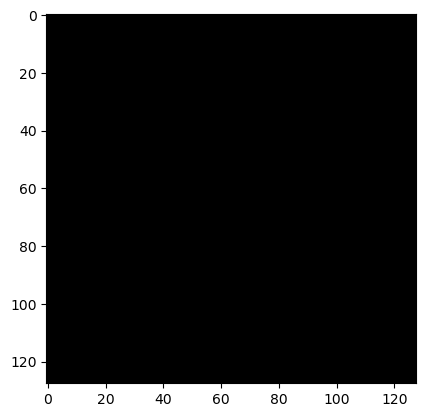

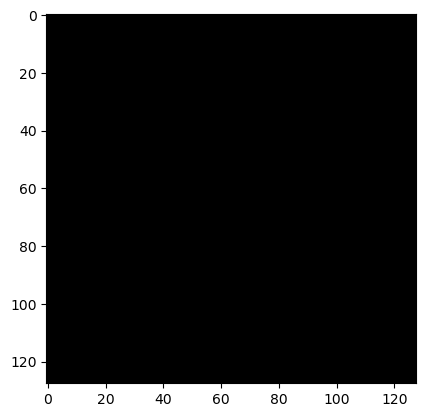

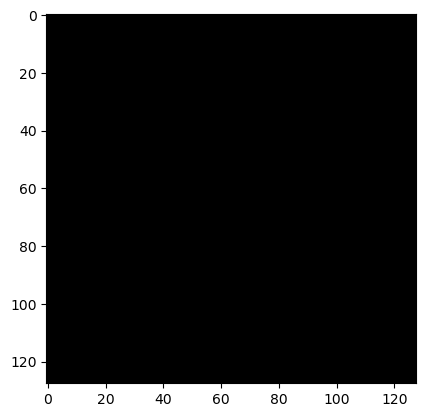

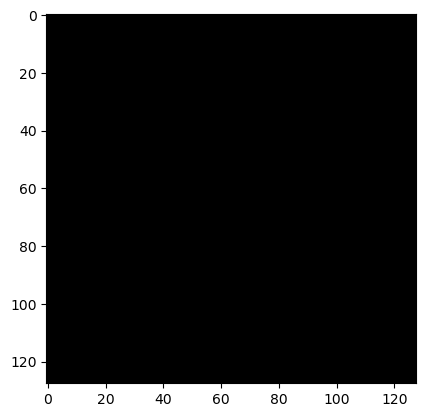

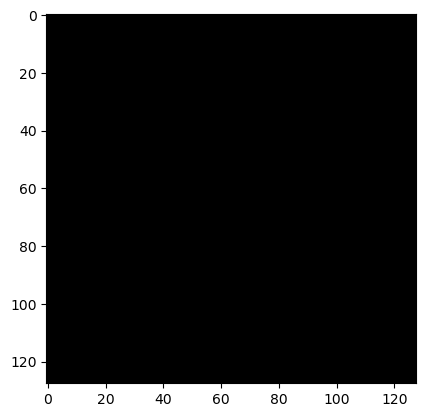

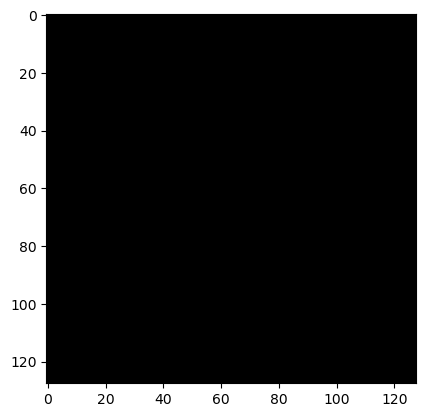

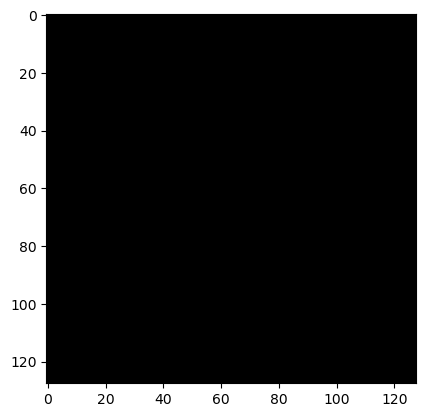

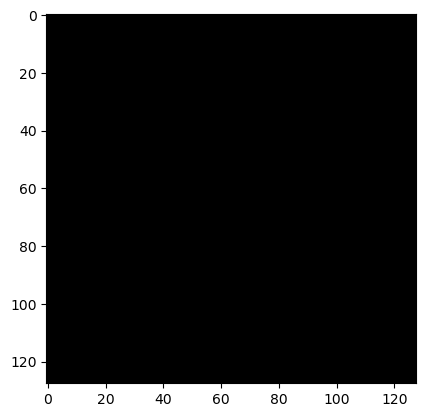

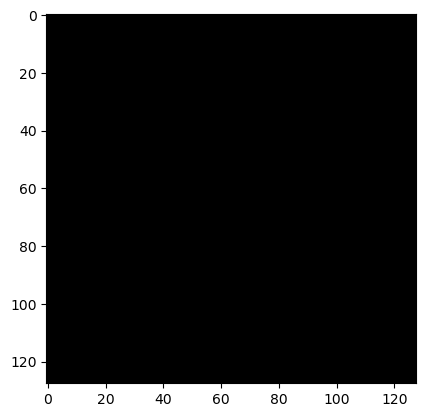

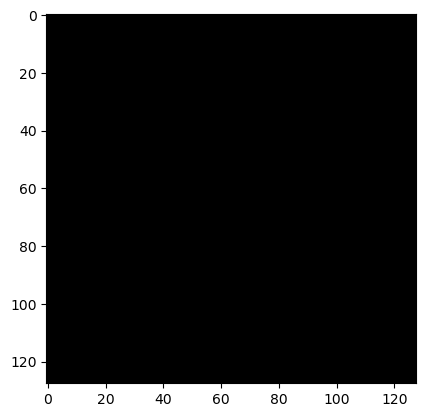

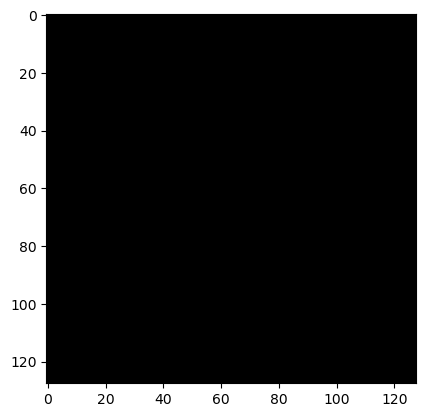

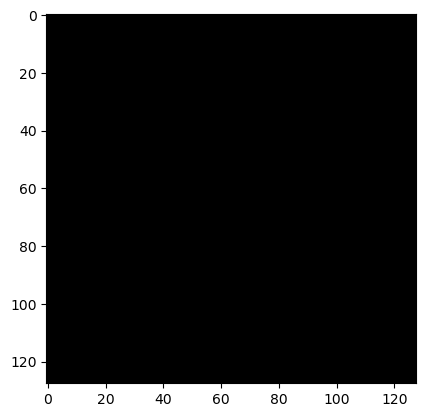

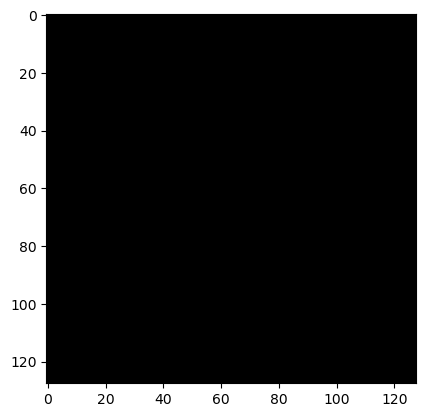

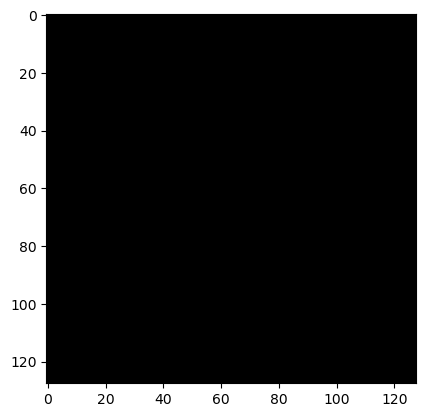

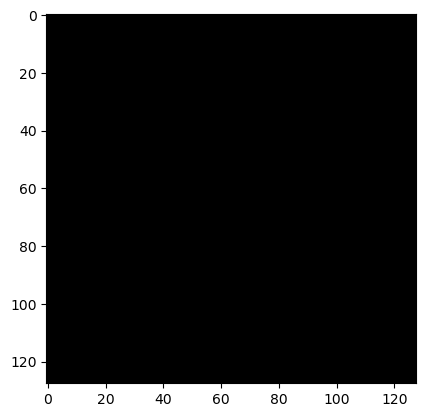

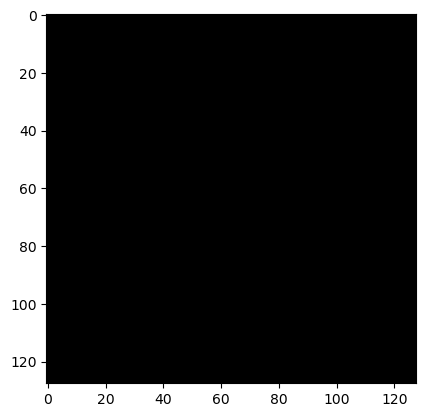

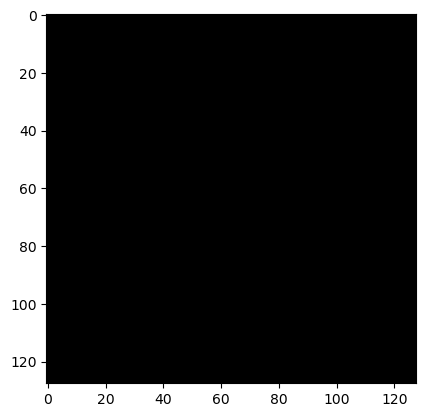

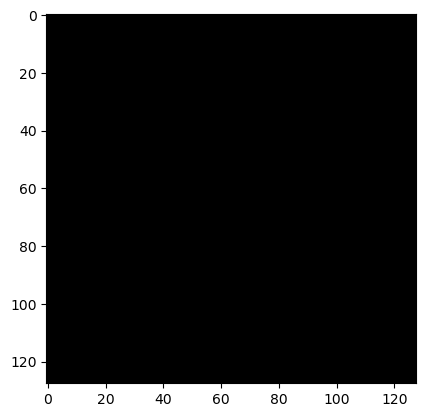

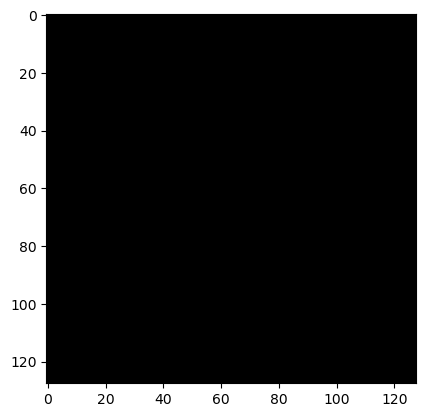

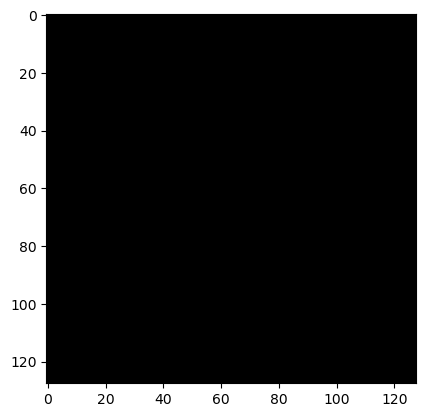

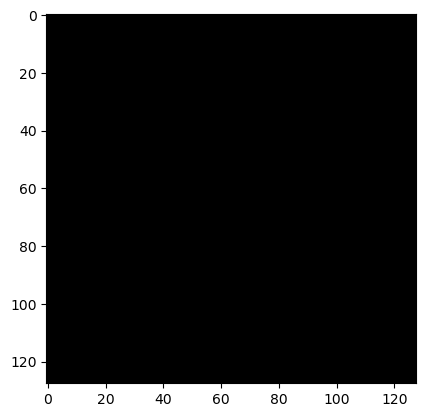

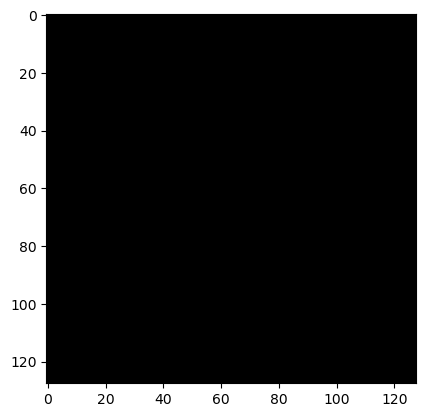

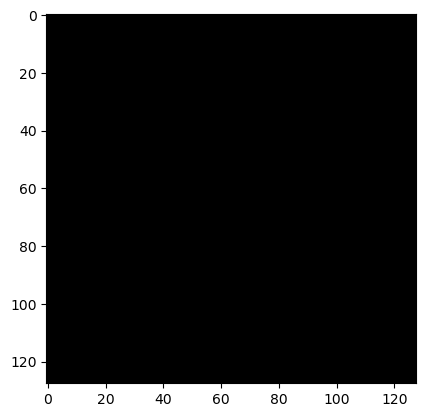

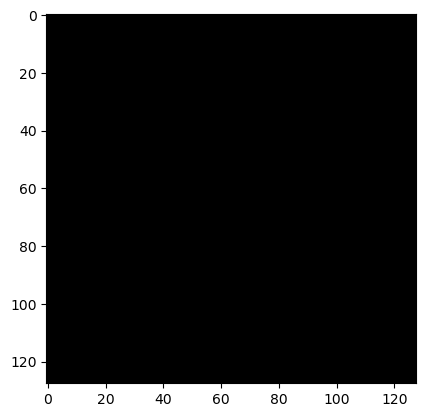

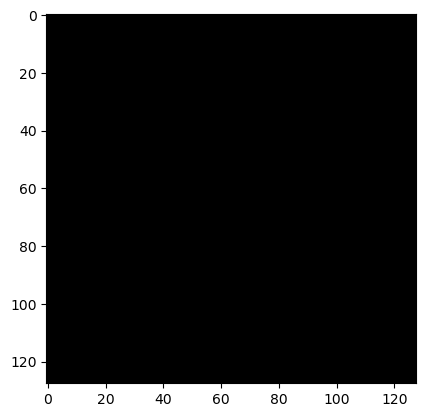

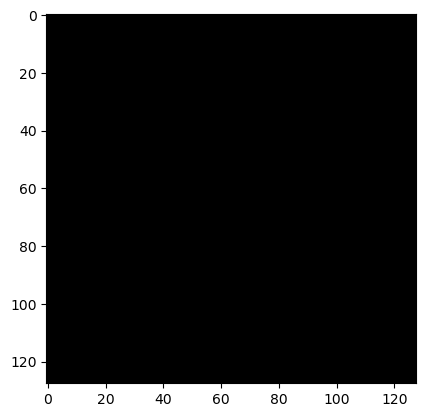

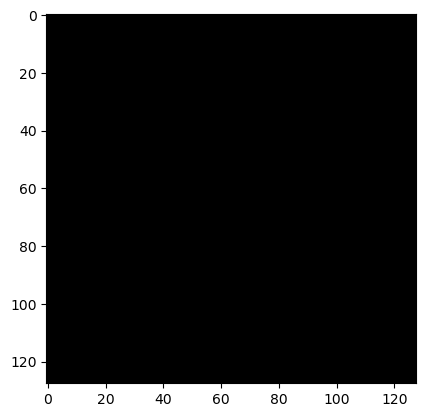

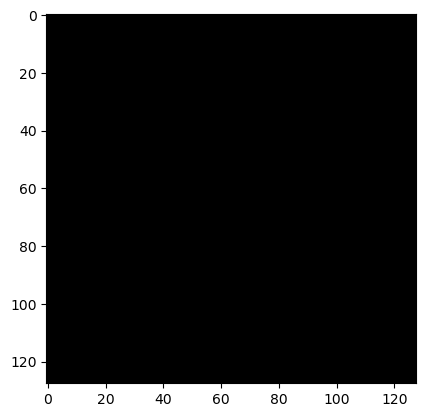

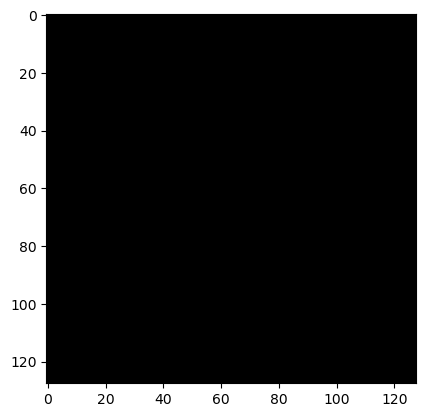

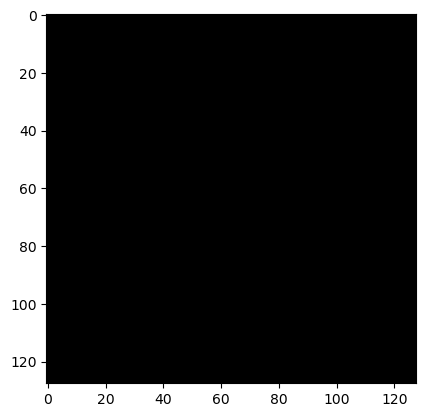

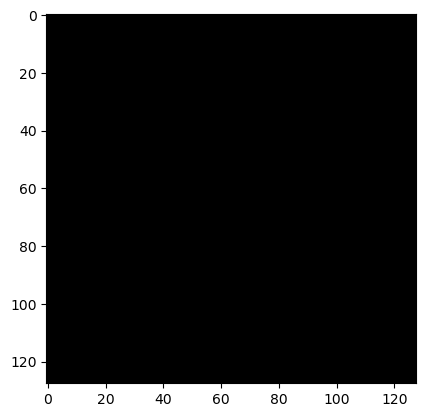

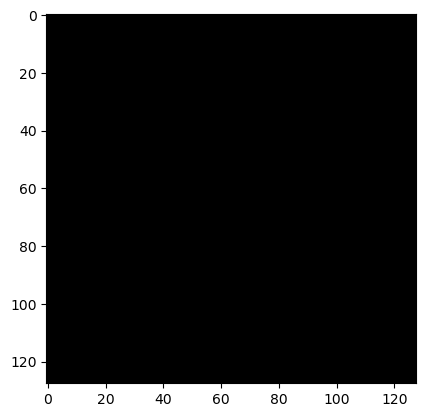

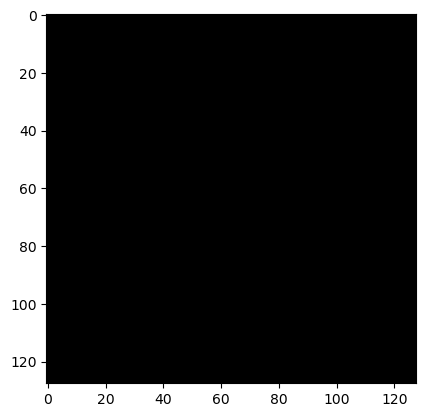

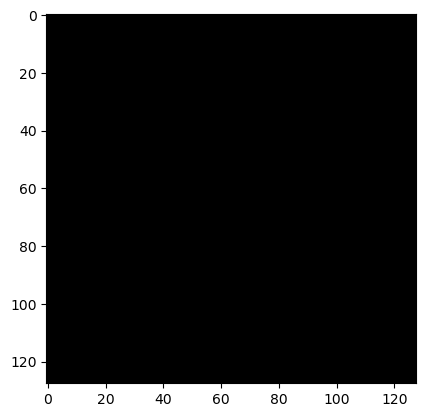

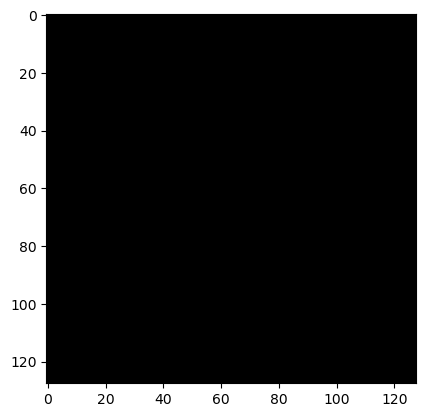

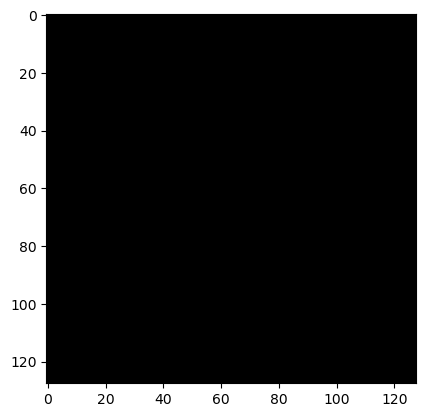

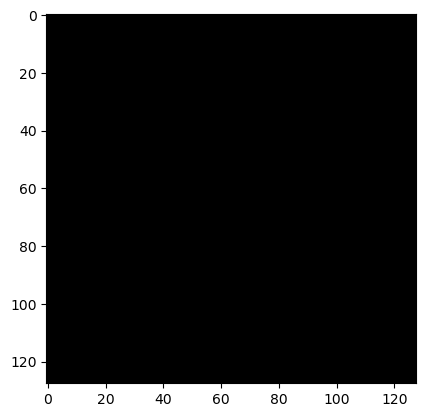

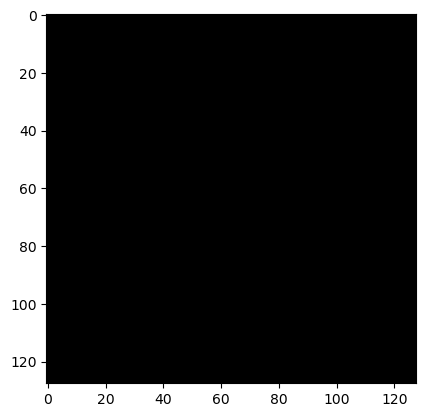

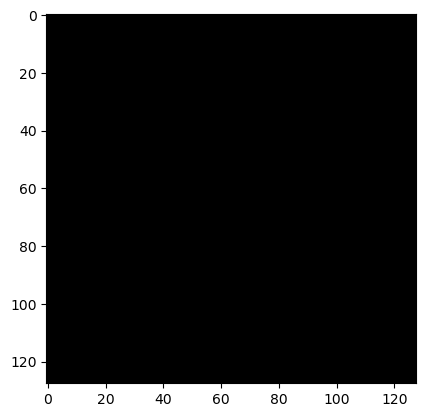

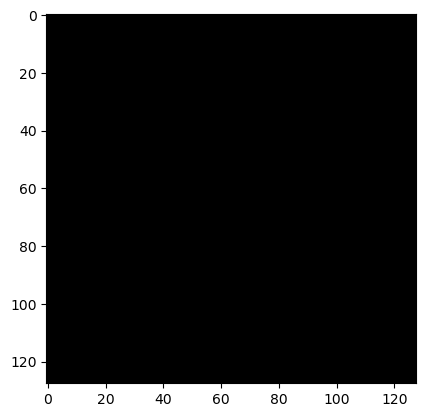

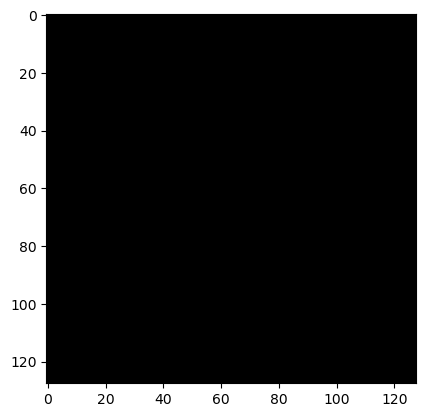

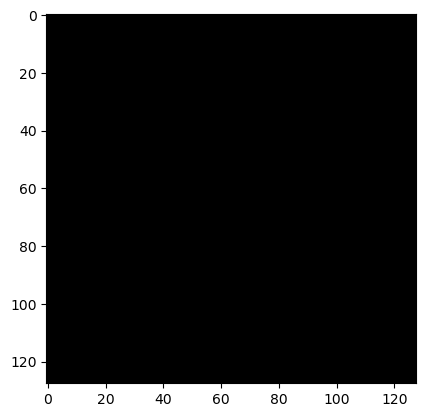

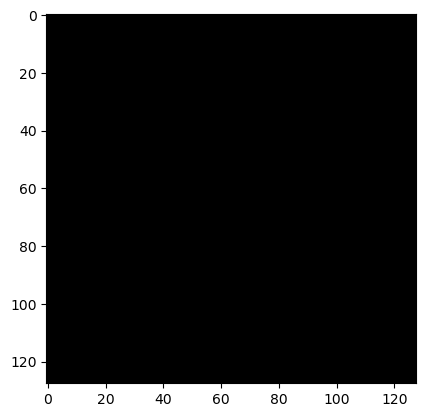

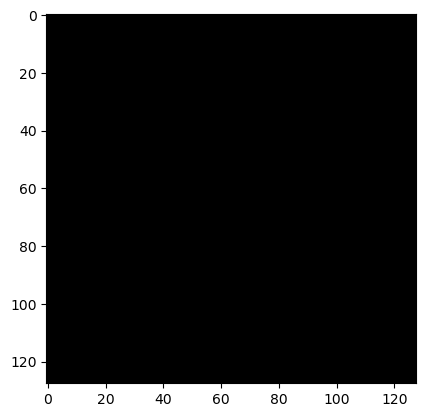

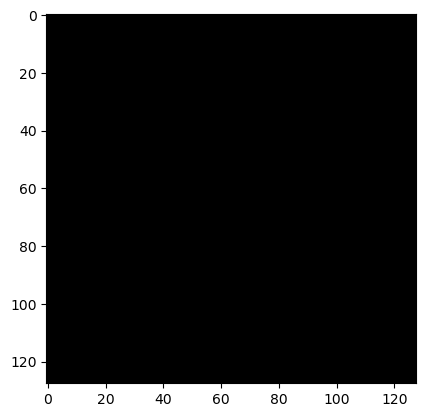

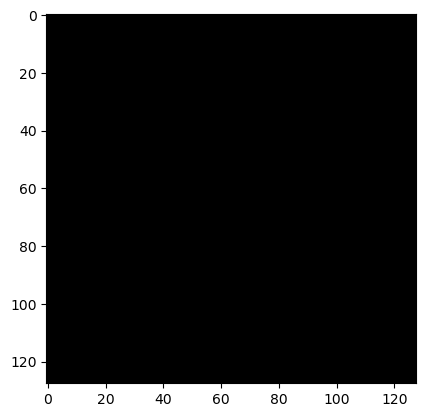

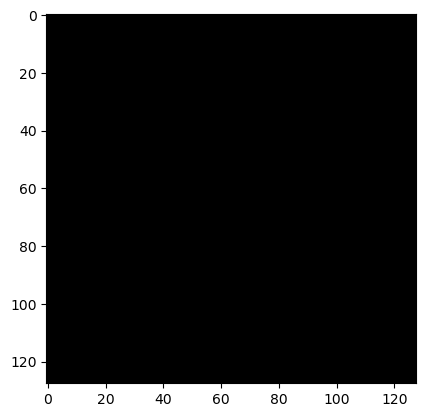

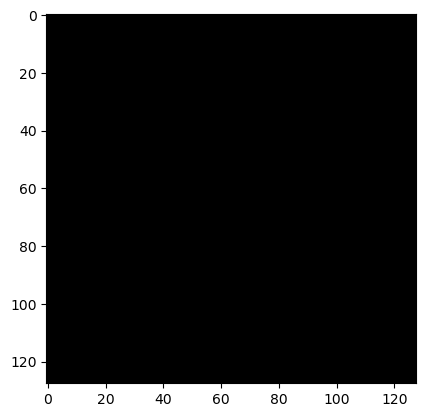

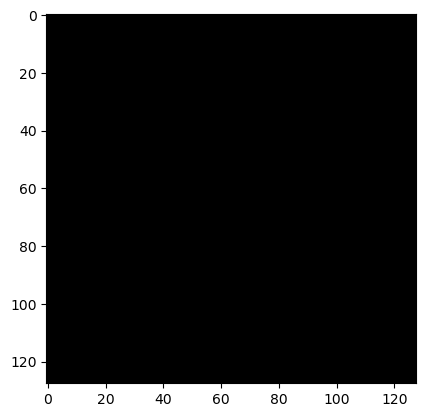

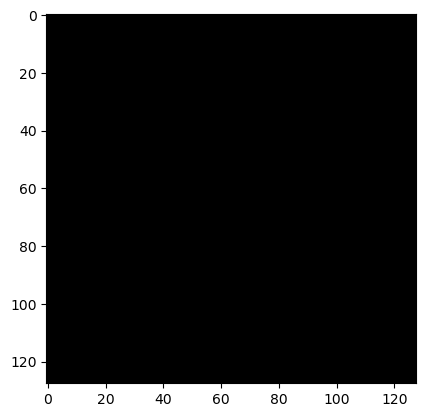

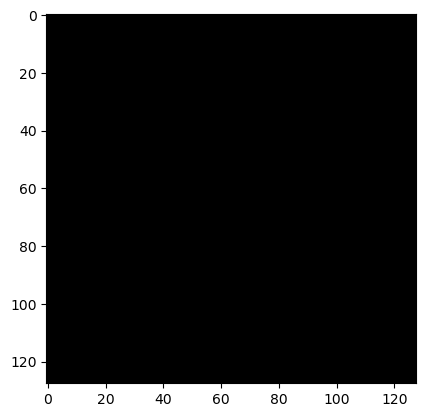

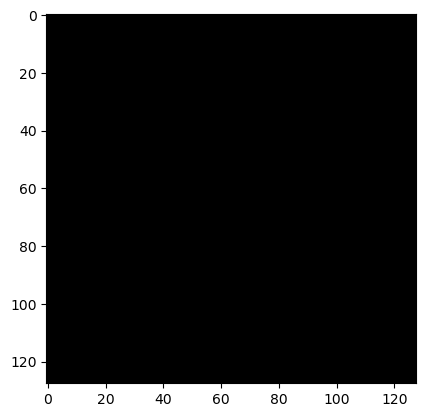

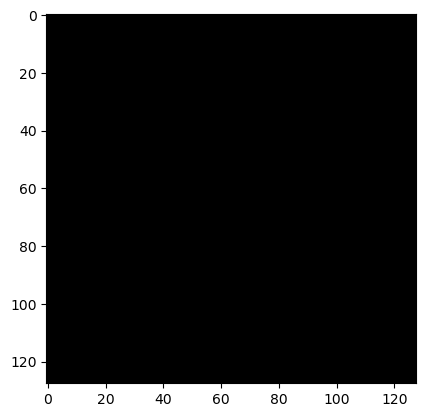

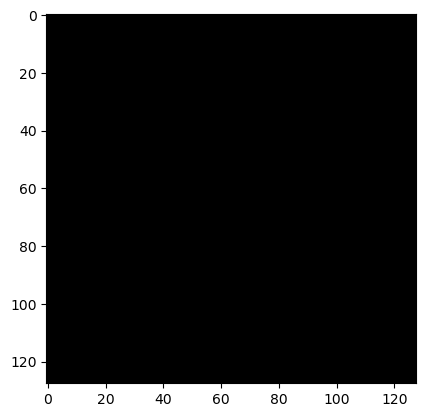

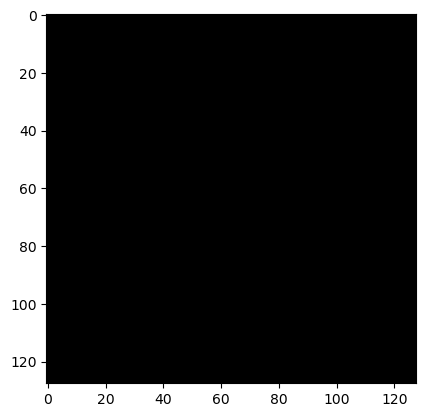

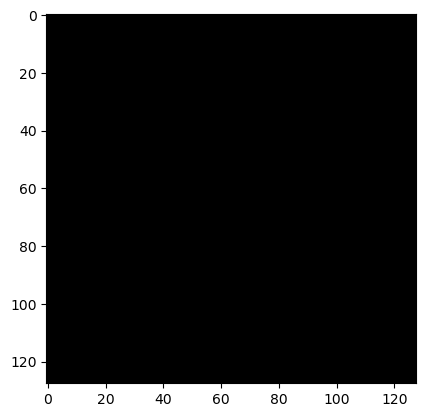

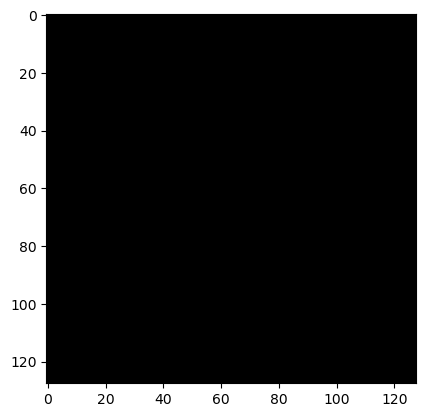

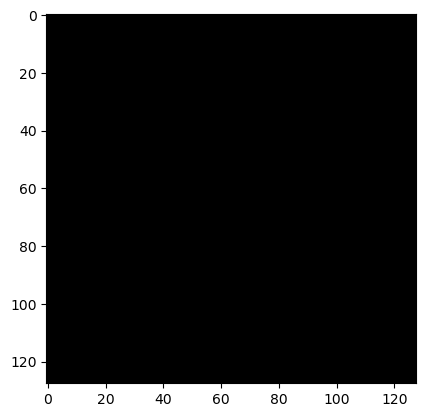

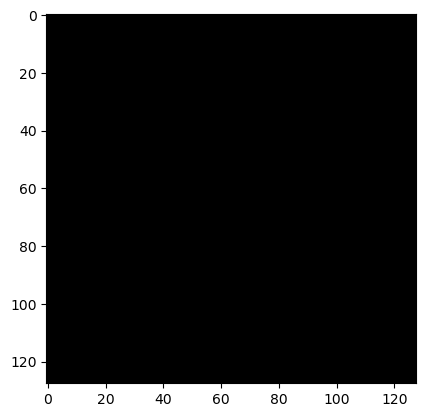

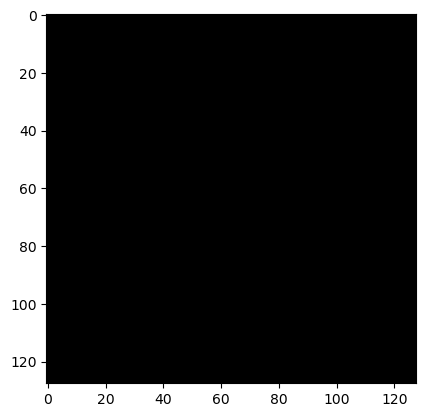

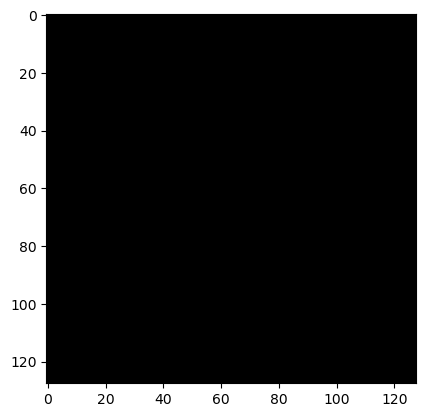

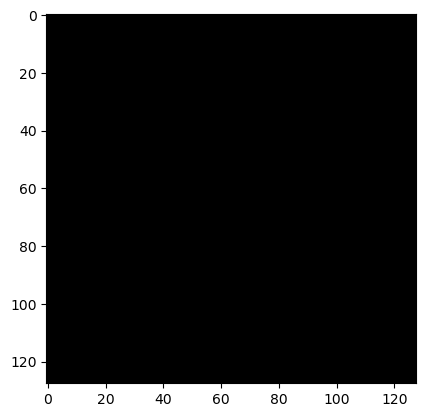

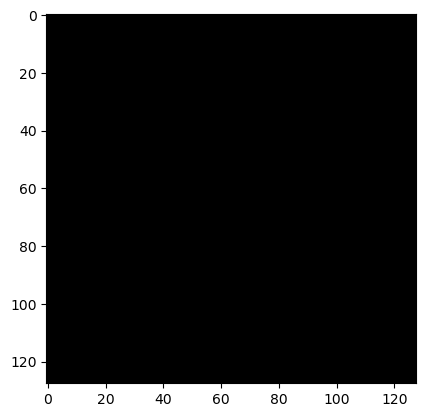

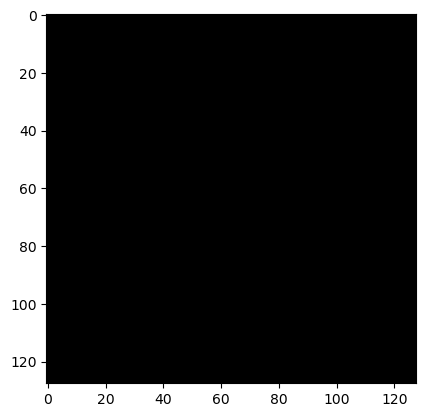

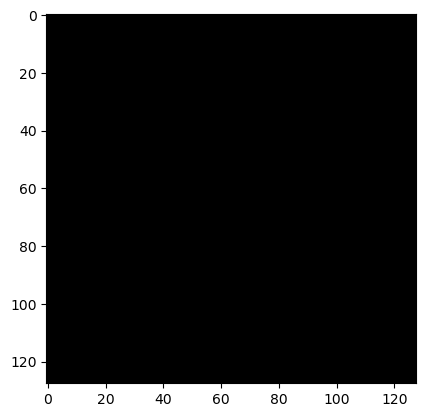

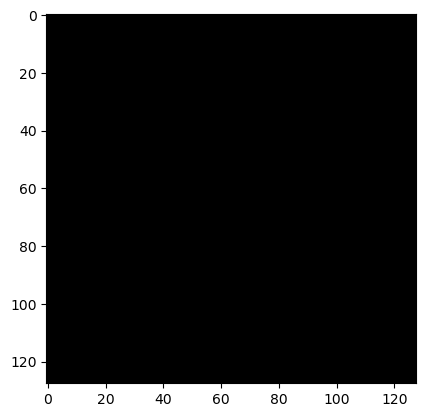

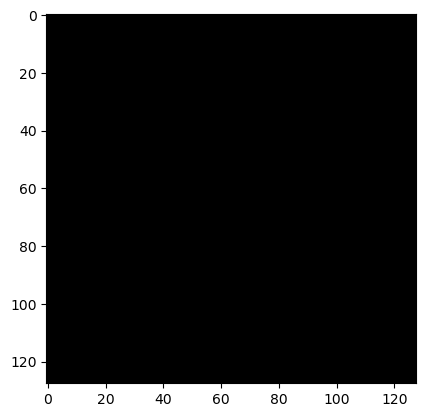

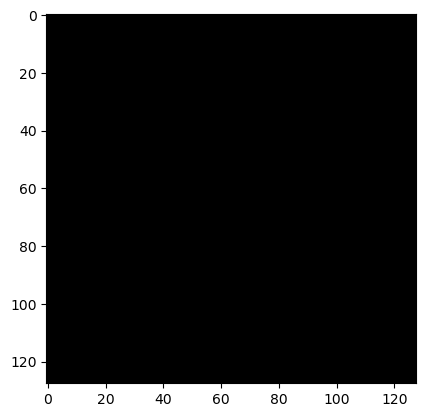

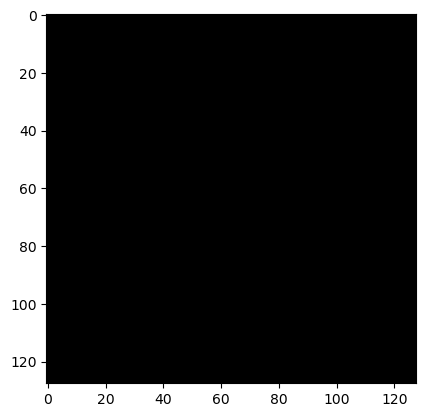

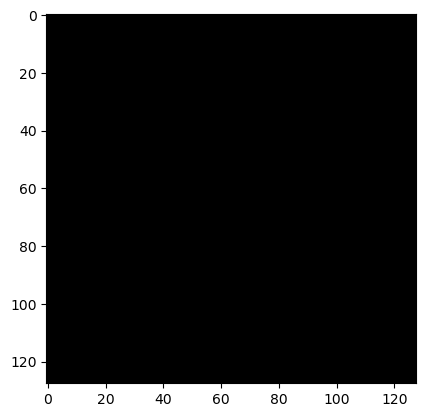

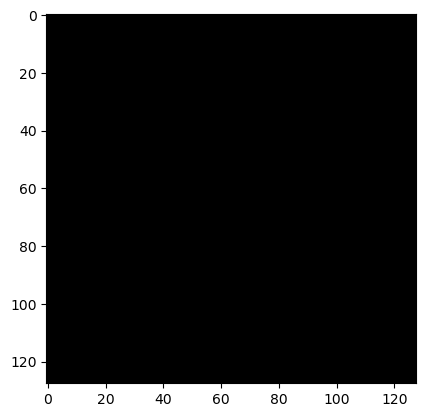

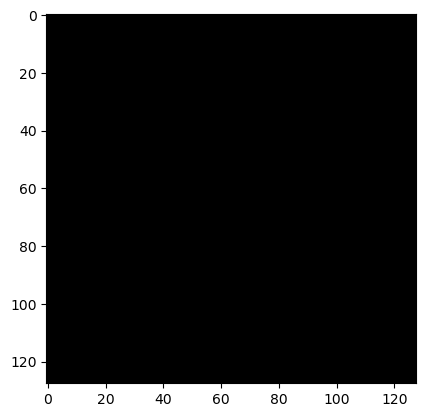

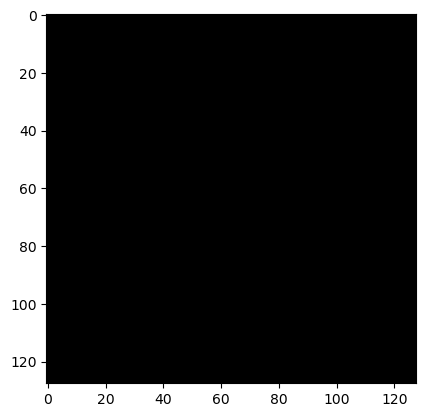

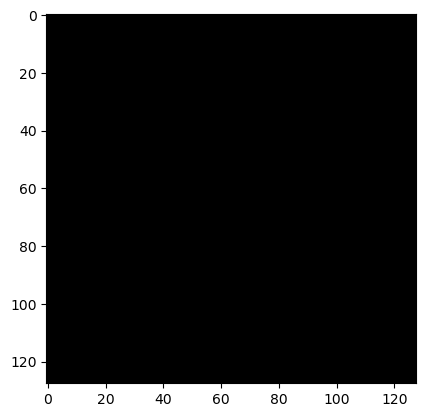

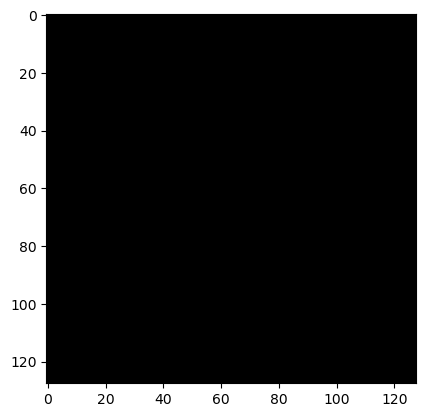

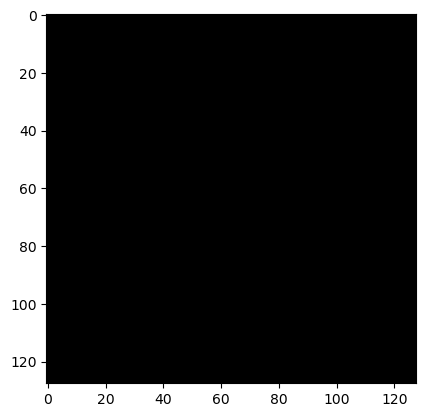

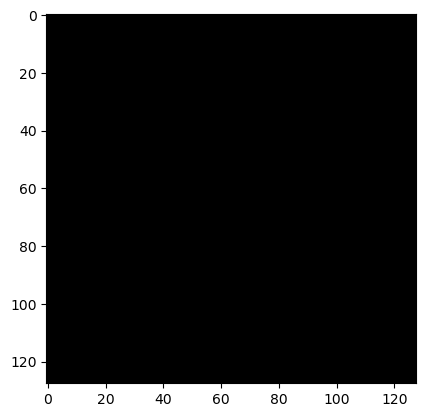

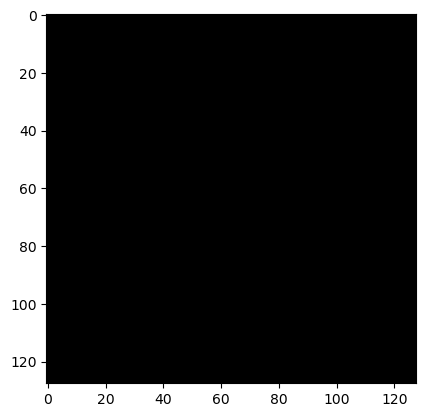

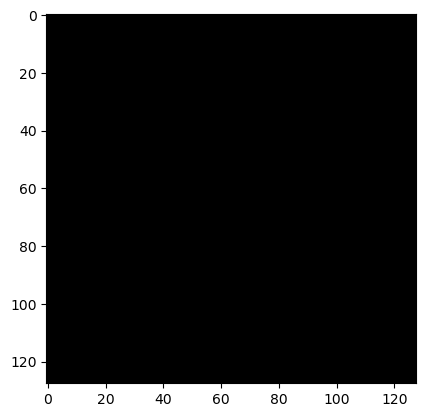

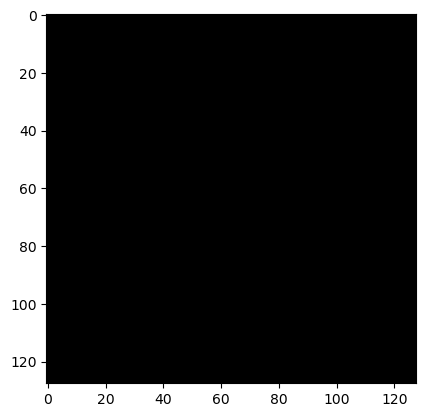

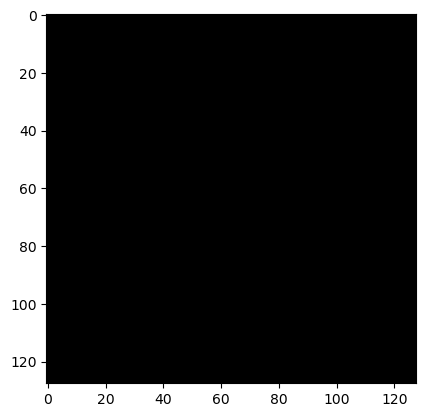

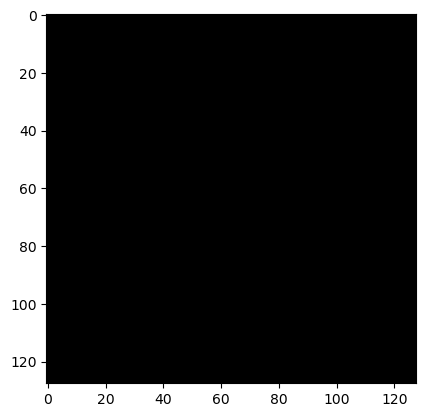

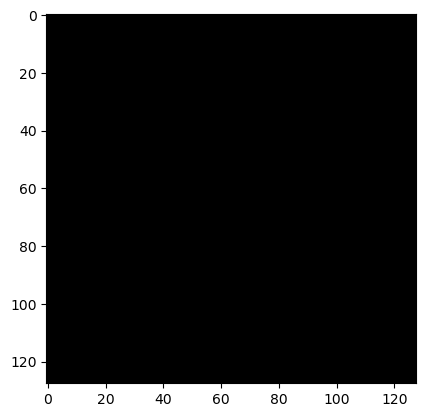

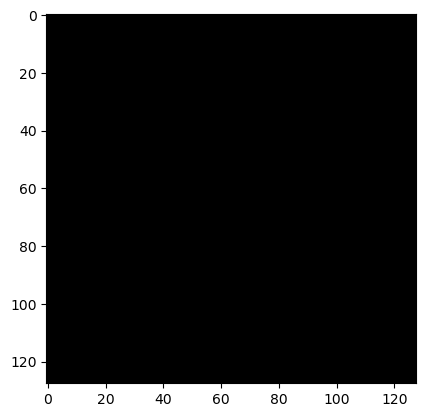

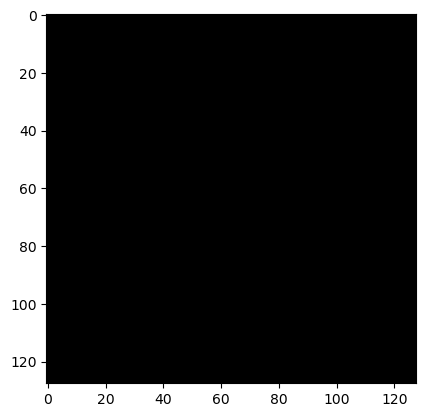

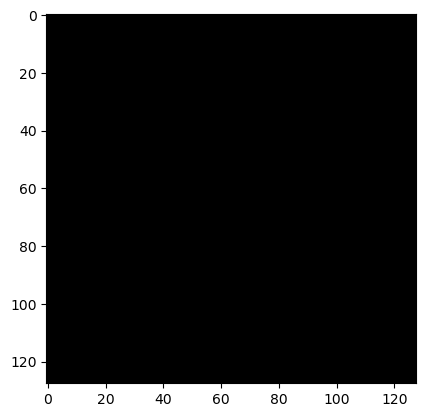

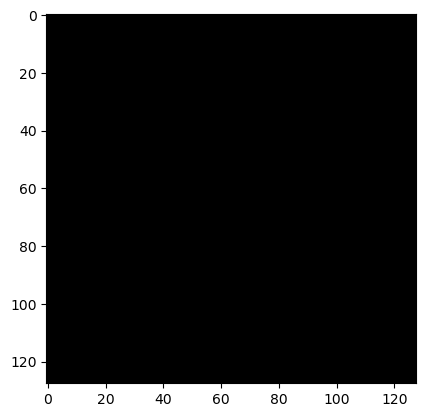

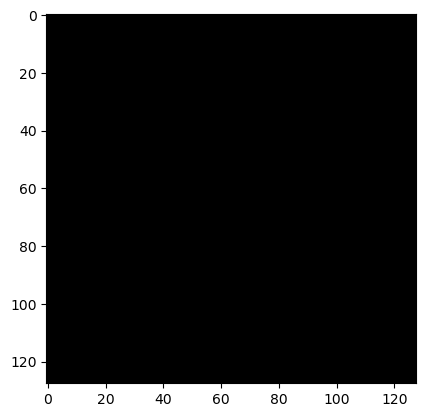

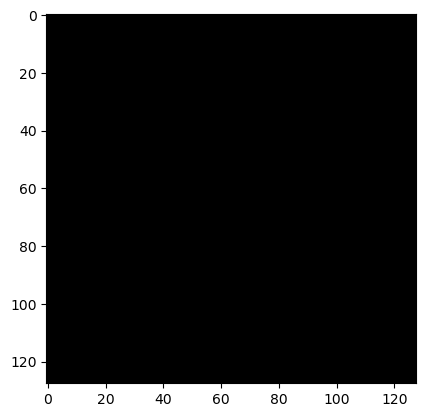

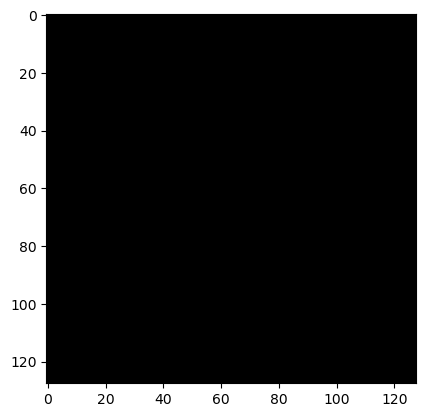

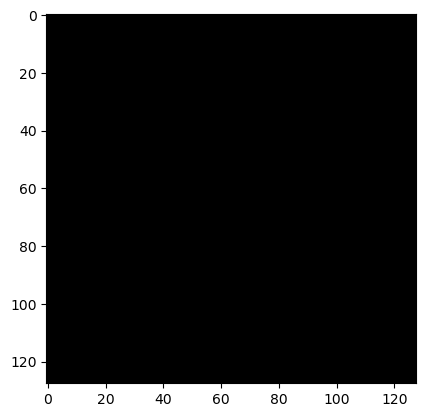

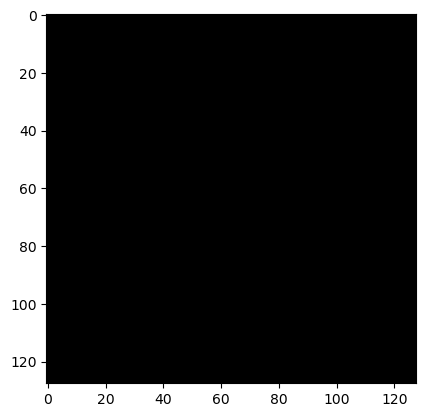

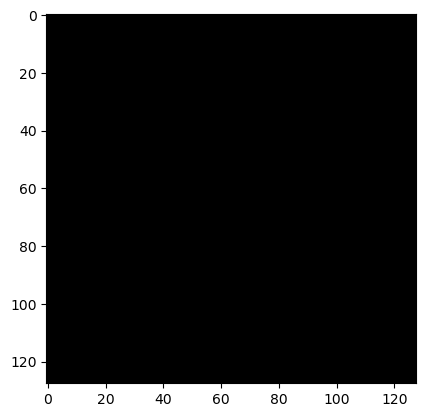

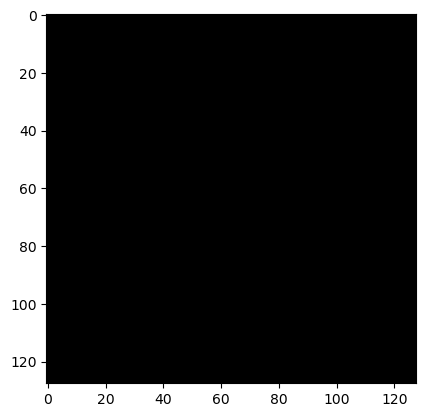

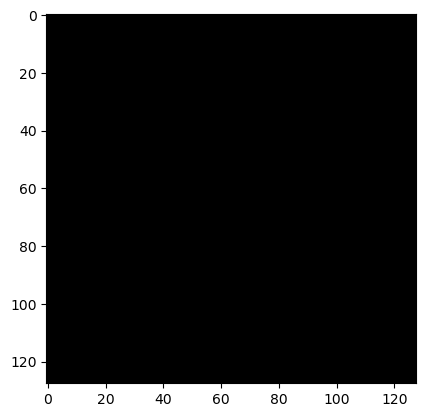

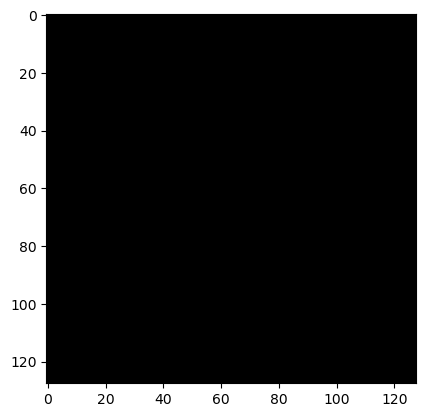

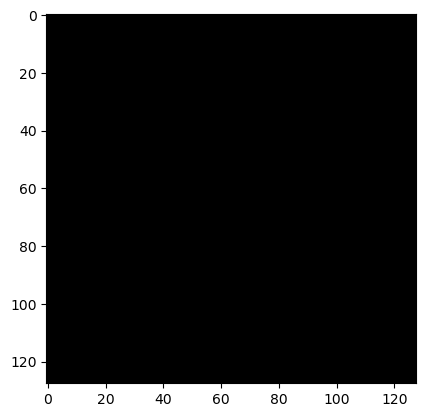

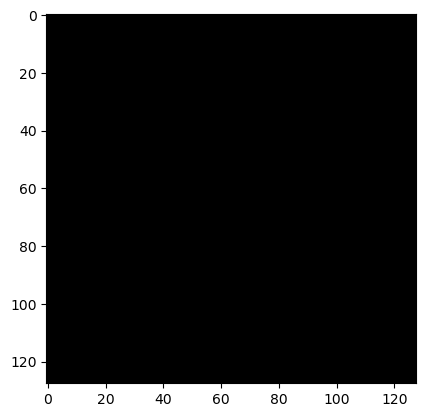

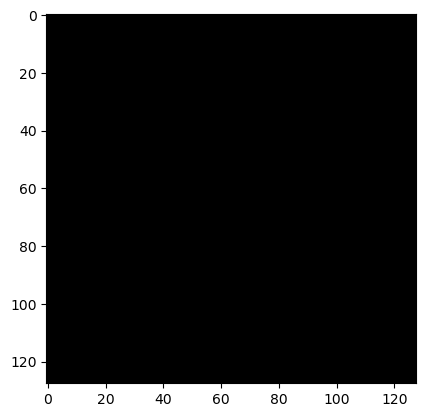

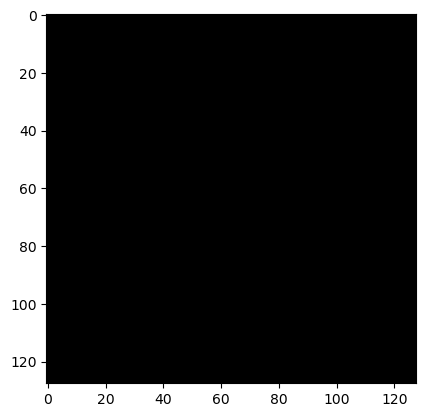

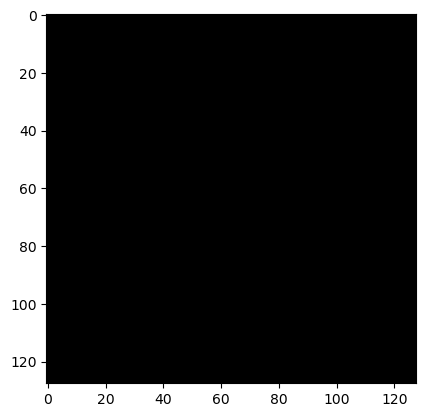

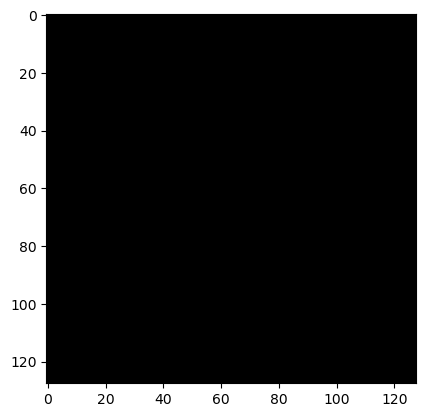

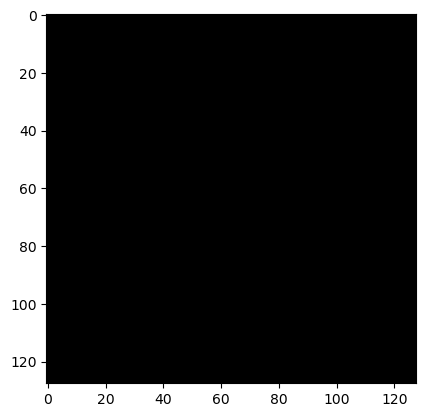

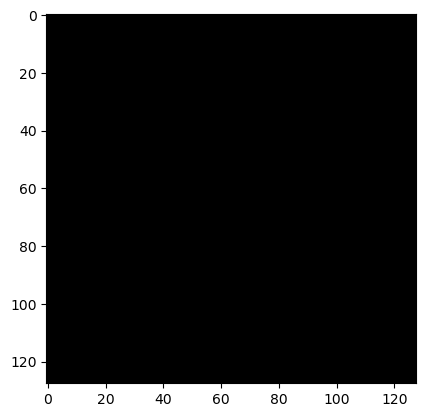

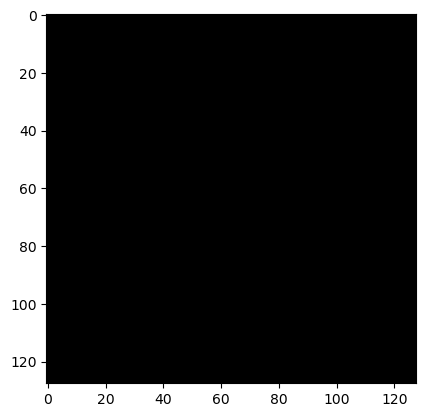

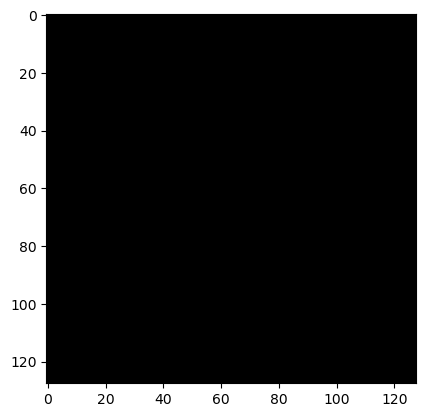

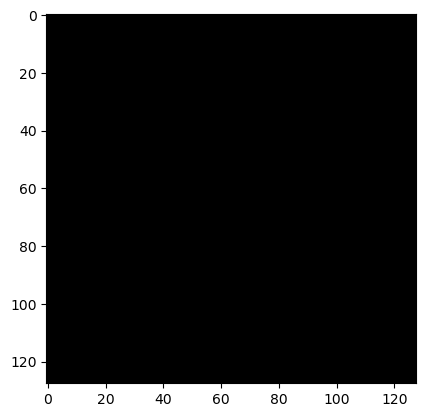

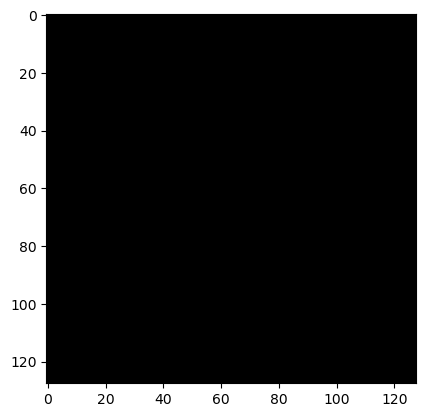

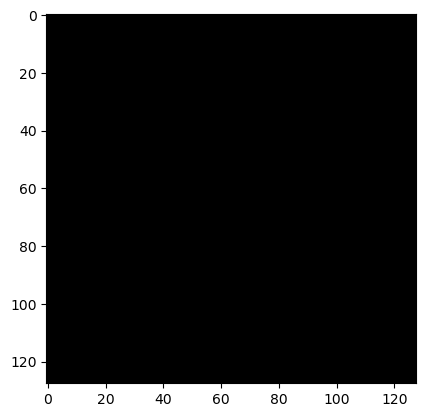

KeyboardInterrupt: 

In [103]:
import matplotlib
matplotlib.rcParams['animation.embed_limit'] = 200

maximum_pop = np.max(system_history_diffusiveLotkaVolterra)

for state in system_history_diffusiveLotkaVolterra :
  state = state / maximum_pop
  # print(np.min(state), np.max(state))
  image = np.pad(np.moveaxis(state, 0 , -1), [(0, 0),(0, 0),(0, 1)], mode='constant', constant_values=0)
  plt.imshow(image)
  plt.show()
  sleep(0.1)

import matplotlib.cm as cm
import matplotlib.animation as animation

frames = [] # for storing the generated images
fig = plt.figure()
for state in system_history_diffusiveLotkaVolterra :
  state = state / np.max(state)
  # print(np.min(state), np.max(state))
  image = np.pad(np.moveaxis(state, 0 , -1), [(0, 0),(0, 0),(0, 1)], mode='constant', constant_values=0)
  frames.append([plt.imshow(image,animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())
#ani.save('movie.mp4')

In [ ]:
average_pop = np.average(np.array(system_history_diffusiveLotkaVolterra), axis=(2,3))
plt.plot(average_pop[:,0], 'r')
plt.plot(average_pop[:,1], 'b')
plt.show()